In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy.stats import shapiro, levene, kruskal,f_oneway,ttest_ind
import pingouin as pg
from factor_analyzer import FactorAnalyzer

In [55]:
data = pd.read_csv("data.csv")
data = data.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'DistributionChannel', 'UserLanguage', 'prolificid','comment','gender_9_TEXT','diet_5_TEXT'])
data = data.dropna()
data

,moral_concern_1_1,moral_concern_1_2,moral_concern_1_3,moral_concern_1_4,moral_concern_1_5,moral_concern_1_6,moral_concern_1_7,moral_concern_1_8,moral_concern_1_9,moral_concern_1_10,...,reduce_meat_10,diet,breakfast_meat,lunch_meat,dinner_meat,age,gender,nationality,religious,politics
0,6,5,4,3,4,3,3,2,3,2,...,1,1,2,5,6,29,0,183.0,0,-2.0
1,8,7,8,8,3,6,7,5,5,2,...,1,1,1,4,7,33,1,183.0,0,-2.0
2,7,9,6,6,6,6,6,6,6,6,...,2,2,1,1,2,23,1,183.0,0,-1.0
3,4,1,5,5,1,1,3,5,6,1,...,1,1,1,4,8,21,0,183.0,0,-2.0
4,8,8,8,8,8,8,8,8,8,7,...,2,1,1,1,4,46,0,183.0,0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,8,7,7,7,7,5,6,7,5,5,...,2,1,1,3,7,40,1,9.0,0,0.0
594,5,5,5,5,5,5,5,5,5,5,...,1,1,1,3,4,24,1,9.0,0,0.0
595,4,3,3,2,2,3,1,2,2,1,...,1,1,2,5,7,36,1,9.0,0,-2.0
596,9,9,9,9,9,9,9,9,9,9,...,2,5,1,4,4,23,0,9.0,0,-1.0


## Data Visualisations

In [56]:
diet_freq = data['diet'].value_counts()
age_freq = data['age'].value_counts()
gender_freq = data['gender'].value_counts()
religious_freq = data['religious'].value_counts()
politics_freq = data['politics'].value_counts()

# Displaying the frequency distributions
print("Diet Frequency Distribution:")
print(diet_freq)
print("\nAge Frequency Distribution:")
print(age_freq)
print("\nGender Frequency Distribution:")
print(gender_freq)
print("\nReligious Frequency Distribution:")
print(religious_freq)
print("\nPolitics Frequency Distribution:")
print(politics_freq)

Diet Frequency Distribution:
1    455
2     51
3     42
4     21
5     18
Name: diet, dtype: int64

Age Frequency Distribution:
29    30
26    27
19    26
25    26
24    23
30    22
31    20
20    20
21    20
22    19
35    18
28    18
23    17
34    16
32    16
27    15
39    14
46    14
36    14
33    13
53    13
41    12
43    10
42    10
44    10
45    10
18     9
40     9
37     8
38     8
57     8
50     7
48     7
51     7
52     6
54     6
55     6
59     6
49     5
61     5
58     5
47     4
64     3
60     3
56     2
70     2
66     2
73     2
65     2
75     2
68     2
62     2
86     1
80     1
63     1
69     1
78     1
72     1
Name: age, dtype: int64

Gender Frequency Distribution:
0    318
1    256
9     13
Name: gender, dtype: int64

Religious Frequency Distribution:
0    435
1    152
Name: religious, dtype: int64

Politics Frequency Distribution:
 0.0    167
-2.0    154
-1.0     98
-3.0     78
 1.0     52
 2.0     27
 3.0     11
Name: politics, dtype: int64


politics Please indicate your political identity

o Strongly left wing  (-3)  
o Left wing  (-2)  
o Centre-left  (-1)  
o Centre  (0)  
o Centre-right  (1)  
o Right wing  (2)  
o Strongly right wing  (3)

religious Would you describe yourself as religious? 

o Yes  (1)  
o No  (0) 

gender What is your gender? 

o Male  (1)  
o Female  (0)  
o I rather self-describe:  (9)

diet Please indicate your dietary preference
 
o Omnivore  (1)  
o Restricted omnivore (e.g., pescetarian)  (2)  
o Vegetarian  (3)  
o Vegan  (4)  
o Other:  (5)

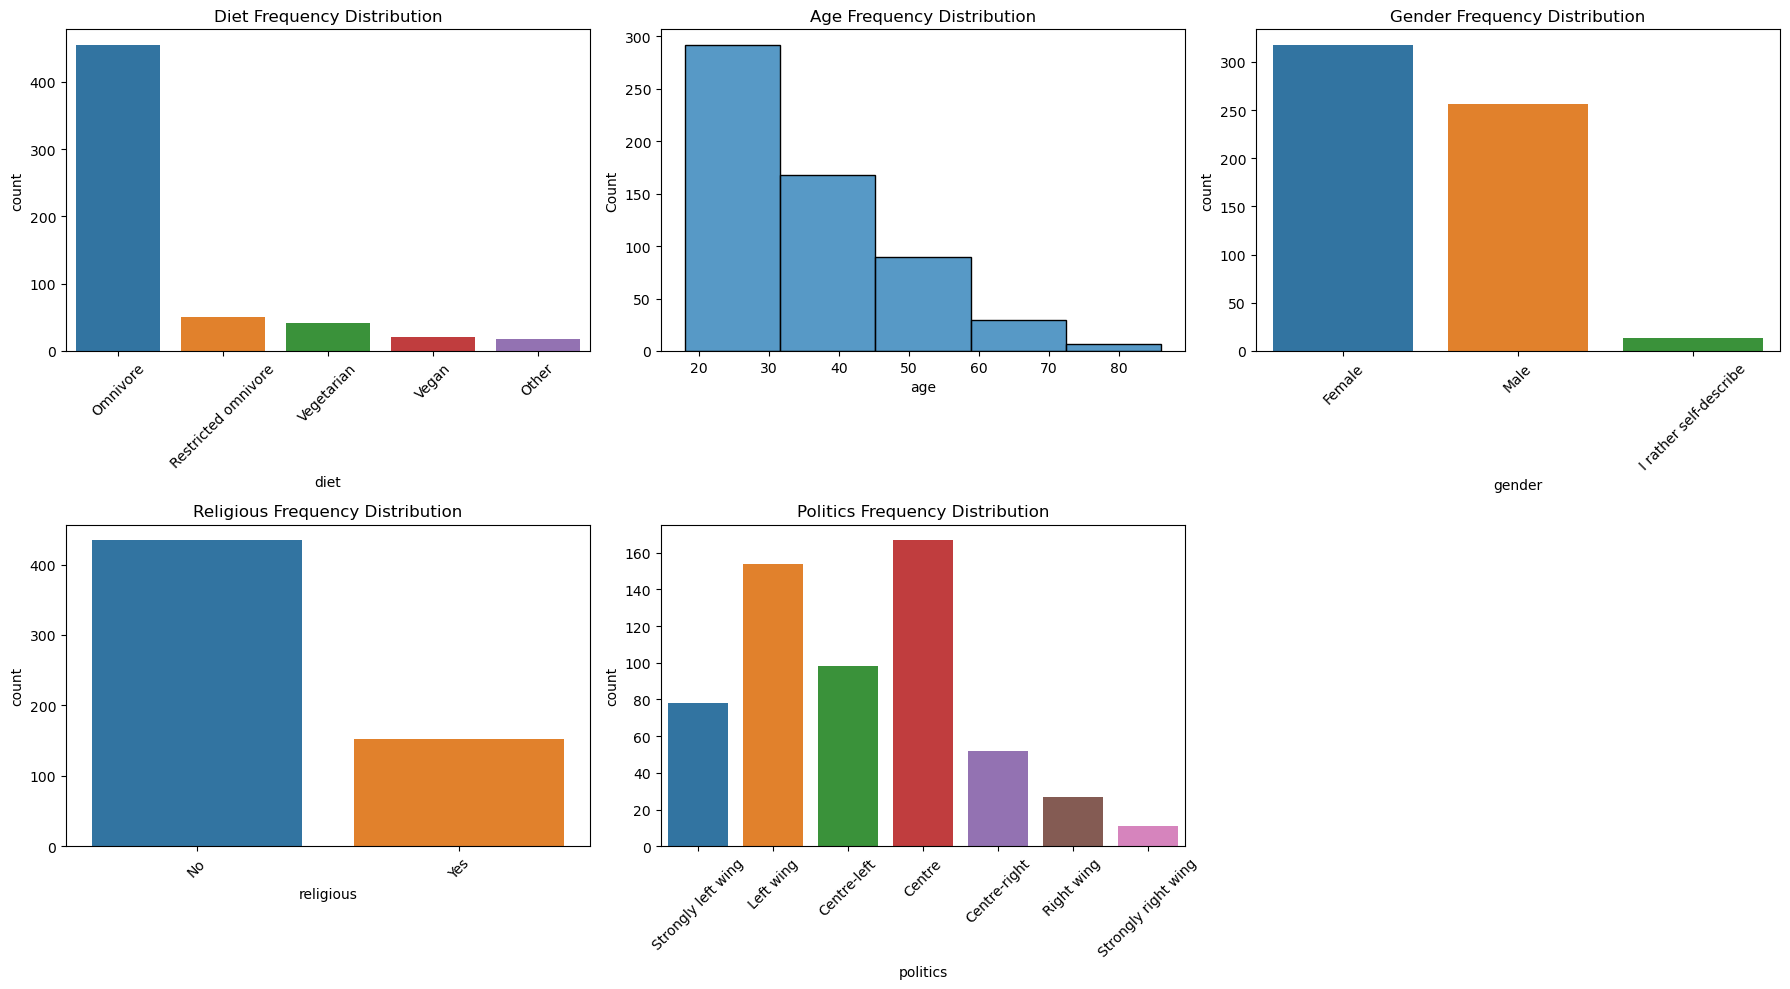

In [57]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Map original labels to descriptions
diet_labels = {
    1: 'Omnivore',
    2: 'Restricted omnivore',
    3: 'Vegetarian',
    4: 'Vegan',
    5: 'Other'
}

gender_labels = {
    1: 'Male',
    0: 'Female',
    9: 'I rather self-describe'
}

religious_labels = {
    1: 'Yes',
    0: 'No'
}

politics_labels = {
    -3: 'Strongly left wing',
    -2: 'Left wing',
    -1: 'Centre-left',
    0: 'Centre',
    1: 'Centre-right',
    2: 'Right wing',
    3: 'Strongly right wing'
}

# Diet Frequency Distribution
sns.countplot(x='diet', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Diet Frequency Distribution')
axes[0, 0].set_xticklabels([diet_labels[label] for label in sorted(diet_labels.keys())], rotation=45)

# Age Frequency Distribution
sns.histplot(data['age'], bins=5, ax=axes[0, 1])
axes[0, 1].set_title('Age Frequency Distribution')

# Gender Frequency Distribution
sns.countplot(x='gender', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Gender Frequency Distribution')
axes[0, 2].set_xticklabels([gender_labels[label] for label in sorted(gender_labels.keys())], rotation=45)

# Religious Frequency Distribution
sns.countplot(x='religious', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Religious Frequency Distribution')
axes[1, 0].set_xticklabels([religious_labels[label] for label in sorted(religious_labels.keys())], rotation=45)

# Politics Frequency Distribution
sns.countplot(x='politics', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Politics Frequency Distribution')
axes[1, 1].set_xticklabels([politics_labels[label] for label in sorted(politics_labels.keys())], rotation=45)

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

## Checking test-retest reliability

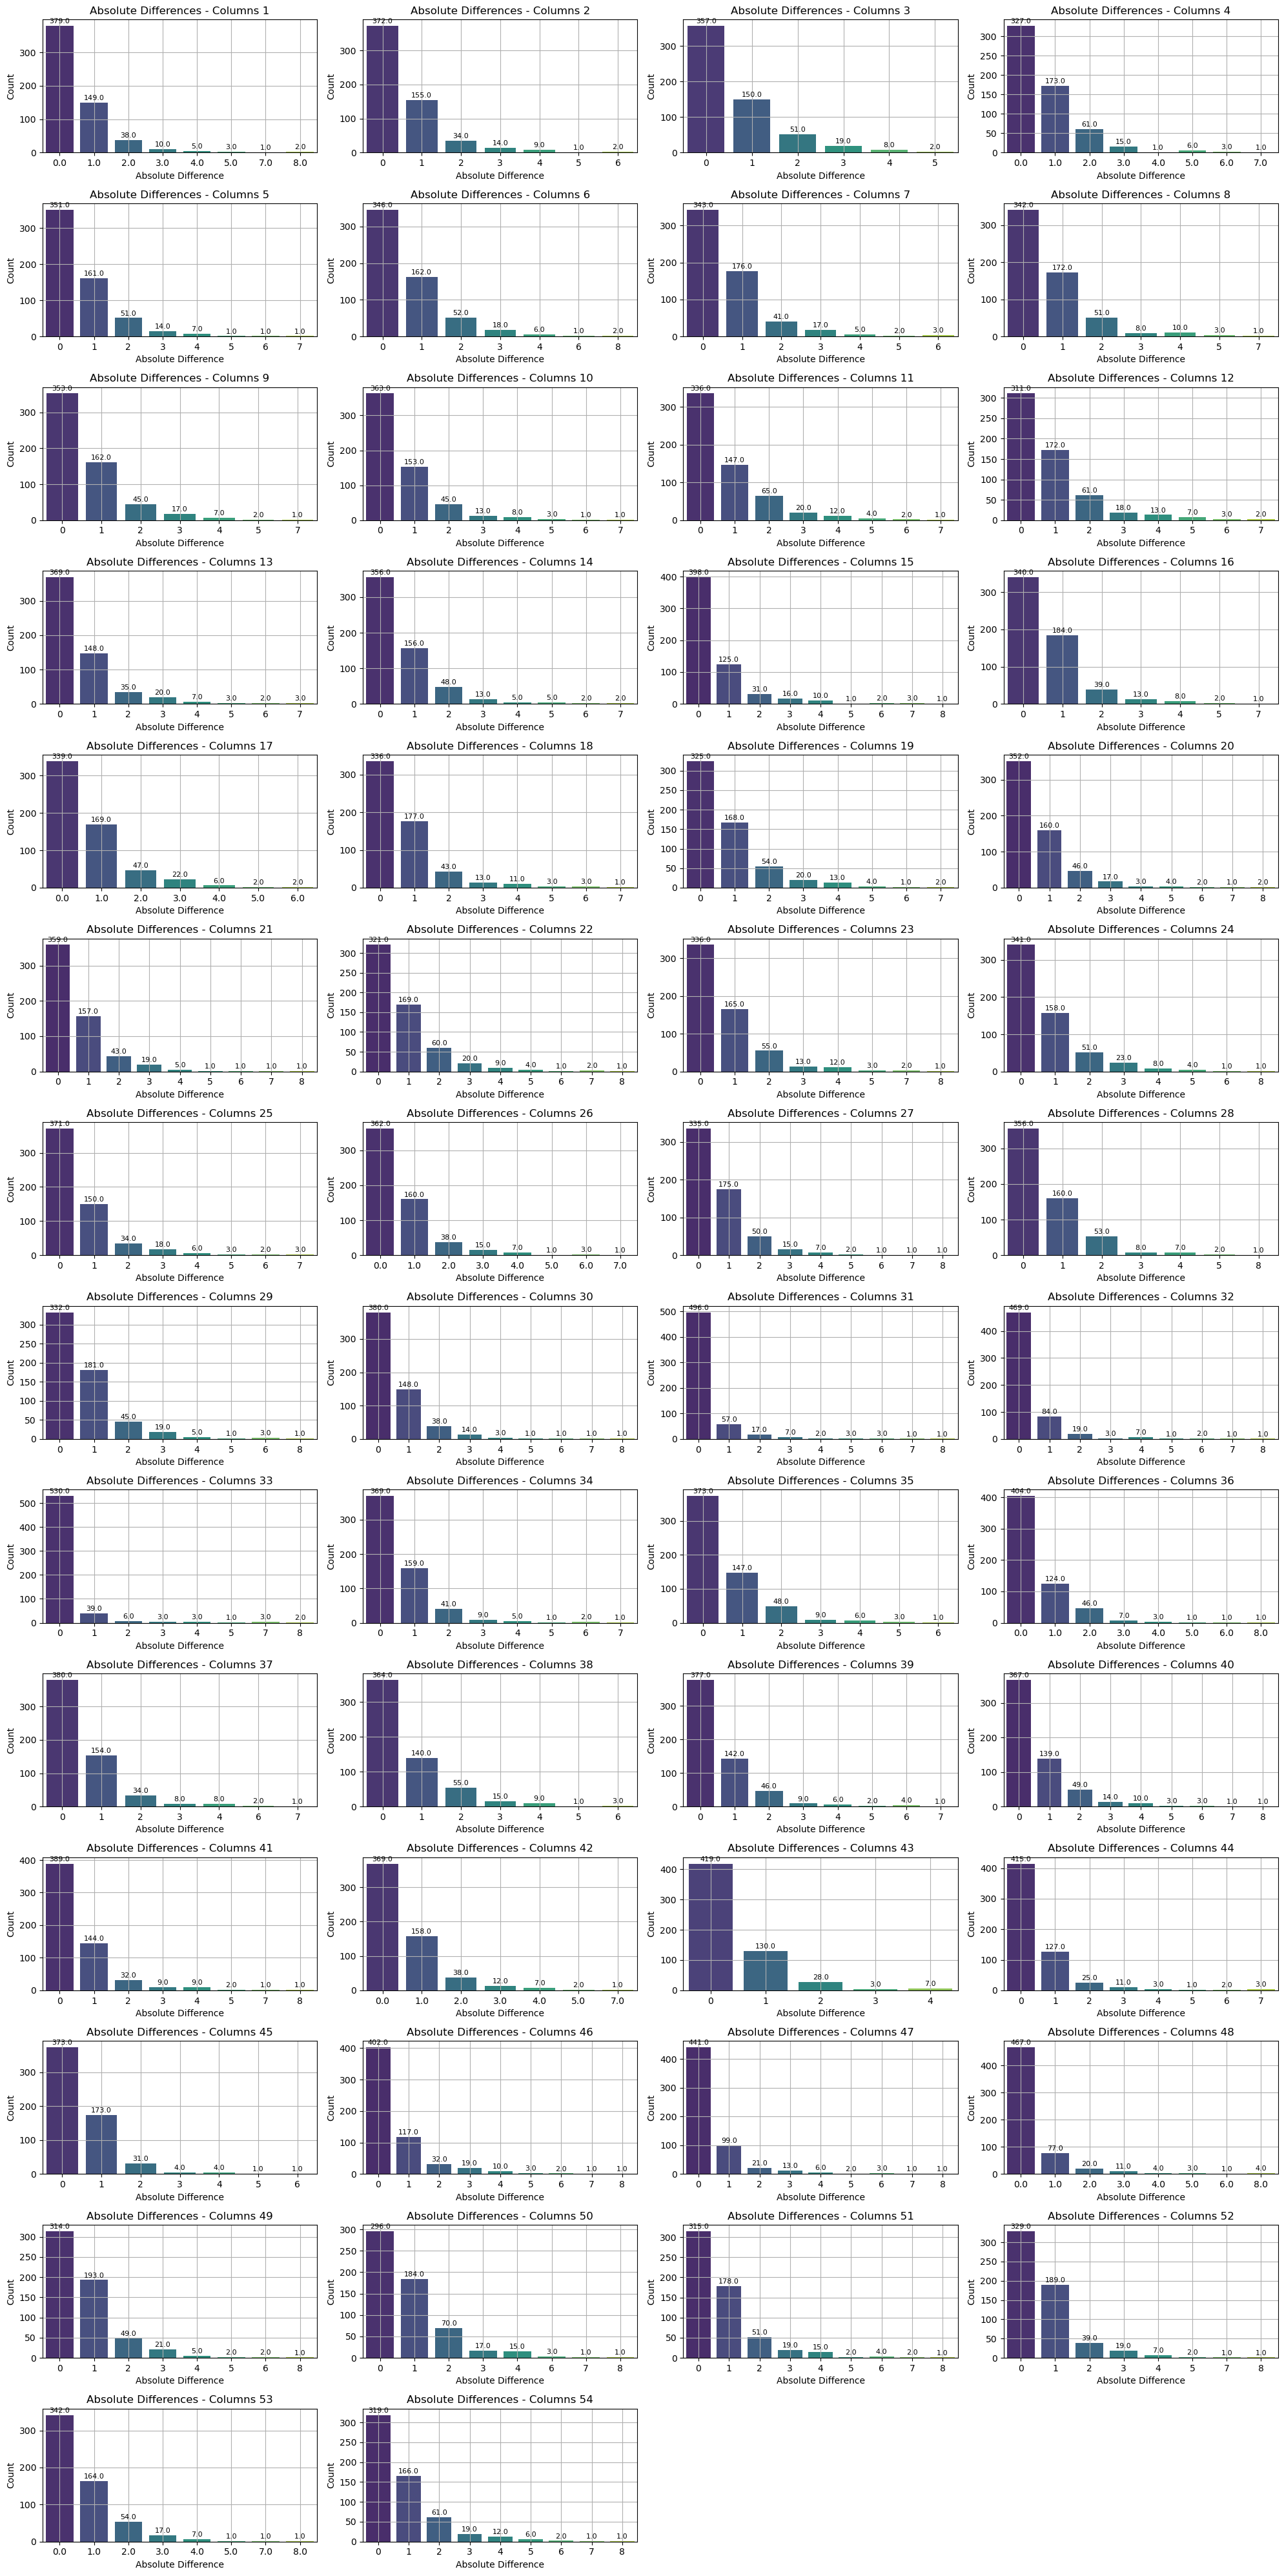

In [58]:
num_rows = 14
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
axes = axes.flatten()

for i in range(54):
    ratings_1 = data[f'moral_concern_1_{i+1}'].to_numpy()
    ratings_2 = data[f'moral-concern_2_{i+1}'].to_numpy()
    abs_diff_ratings = np.abs(ratings_1 - ratings_2)
    sns.countplot(x=abs_diff_ratings, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Absolute Differences - Columns {i+1}')
    axes[i].set_xlabel('Absolute Difference')
    axes[i].set_ylabel('Count')
    axes[i].grid(True)
    
    # Annotate each bar with its frequency value
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Hide any empty subplots
for i in range(54, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [59]:
dict1 = {
    "moral_concern_1_1": "Dog",
    "moral_concern_1_2": "Cat",
    "moral_concern_1_3": "Horse",
    "moral_concern_1_4": "Rabbit",
    "moral_concern_1_5": "Cow",
    "moral_concern_1_6": "Pig",
    "moral_concern_1_7": "Chicken",
    "moral_concern_1_8": "Goat",
    "moral_concern_1_9": "Sheep",
    "moral_concern_1_10": "Shrimp",
    "moral_concern_1_11": "Fish",
    "moral_concern_1_12": "Bee",
    "moral_concern_1_13": "Wasp",
    "moral_concern_1_14": "Ant",
    "moral_concern_1_15": "Fly",
    "moral_concern_1_16": "Octopus",
    "moral_concern_1_17": "Frog",
    "moral_concern_1_18": "Worm",
    "moral_concern_1_19": "Pigeon",
    "moral_concern_1_20": "Owl",
    "moral_concern_1_21": "Whale",
    "moral_concern_1_22": "Shark",
    "moral_concern_1_23": "Wolf",
    "moral_concern_1_24": "Snake",
    "moral_concern_1_25": "Rat",
    "moral_concern_1_26": "Spider",
    "moral_concern_1_27": "Mouse",
    "moral_concern_1_28": "Lion",
    "moral_concern_1_29": "Chimpanzee",
    "moral_concern_1_30": "Elephant",
    "moral_concern_1_31": "A family member",
    "moral_concern_1_32": "A close friend",
    "moral_concern_1_33": "Your partner/spouse",
    "moral_concern_1_34": "A citizen of the country you live in",
    "moral_concern_1_35": "Somebody from your neighborhood",
    "moral_concern_1_36": "A co-worker",
    "moral_concern_1_37": "A foreign citizen",
    "moral_concern_1_38": "A member of a political party you oppose",
    "moral_concern_1_39": "Somebody with different religious beliefs",
    "moral_concern_1_40": "The head of state of the country you live in",
    "moral_concern_1_41": "A soldier of the country you live in",
    "moral_concern_1_42": "A charity worker",
    "moral_concern_1_43": "A homosexual person",
    "moral_concern_1_44": "A mentally challenged person",
    "moral_concern_1_45": "A refugee",
    "moral_concern_1_46": "A murderer",
    "moral_concern_1_47": "A terrorist",
    "moral_concern_1_48": "A child molester",
    "moral_concern_1_49": "A redwood tree",
    "moral_concern_1_50": "An apple tree",
    "moral_concern_1_51": "A rose bush",
    "moral_concern_1_52": "A coral reef",
    "moral_concern_1_53": "Old-growth forest",
    "moral_concern_1_54": "The highest mountain in the country you live in",
}
dict2 = {
    "moral-concern_2_1": "Dog",
    "moral-concern_2_2": "Cat",
    "moral-concern_2_3": "Horse",
    "moral-concern_2_4": "Rabbit",
    "moral-concern_2_5": "Cow",
    "moral-concern_2_6": "Pig",
    "moral-concern_2_7": "Chicken",
    "moral-concern_2_8": "Goat",
    "moral-concern_2_9": "Sheep",
    "moral-concern_2_10": "Shrimp",
    "moral-concern_2_11": "Fish",
    "moral-concern_2_12": "Bee",
    "moral-concern_2_13": "Wasp",
    "moral-concern_2_14": "Ant",
    "moral-concern_2_15": "Fly",
    "moral-concern_2_16": "Octopus",
    "moral-concern_2_17": "Frog",
    "moral-concern_2_18": "Worm",
    "moral-concern_2_19": "Pigeon",
    "moral-concern_2_20": "Owl",
    "moral-concern_2_21": "Whale",
    "moral-concern_2_22": "Shark",
    "moral-concern_2_23": "Wolf",
    "moral-concern_2_24": "Snake",
    "moral-concern_2_25": "Rat",
    "moral-concern_2_26": "Spider",
    "moral-concern_2_27": "Mouse",
    "moral-concern_2_28": "Lion",
    "moral-concern_2_29": "Chimpanzee",
    "moral-concern_2_30": "Elephant",
    "moral-concern_2_31": "A family member",
    "moral-concern_2_32": "A close friend",
    "moral-concern_2_33": "Your partner/spouse",
    "moral-concern_2_34": "A citizen of the country you live in",
    "moral-concern_2_35": "Somebody from your neighborhood",
    "moral-concern_2_36": "A co-worker",
    "moral-concern_2_37": "A foreign citizen",
    "moral-concern_2_38": "A member of a political party you oppose",
    "moral-concern_2_39": "Somebody with different religious beliefs",
    "moral-concern_2_40": "The head of state of the country you live in",
    "moral-concern_2_41": "A soldier of the country you live in",
    "moral-concern_2_42": "A charity worker",
    "moral-concern_2_43": "A homosexual person",
    "moral-concern_2_44": "A mentally challenged person",
    "moral-concern_2_45": "A refugee",
    "moral-concern_2_46": "A murderer",
    "moral-concern_2_47": "A terrorist",
    "moral-concern_2_48": "A child molester",
    "moral-concern_2_49": "A redwood tree",
    "moral-concern_2_50": "An apple tree",
    "moral-concern_2_51": "A rose bush",
    "moral-concern_2_52": "A coral reef",
    "moral-concern_2_53": "Old-growth forest",
    "moral-concern_2_54": "The highest mountain in the country you live in",
}

In [60]:
from scipy.stats import pearsonr
df1 = data[dict1.keys()]
df1 = df1.rename(columns=dict1)
df2 = data[dict2.keys()]
df2 = df2.rename(columns=dict2)
for i in df1.columns:
    correlation_coefficient, p_value = pearsonr(df1[i], df2[i])
    print("For Column ",i)
    print("Correlation coefficient between column1 and column2:", correlation_coefficient)
    print("p-value:", p_value)

For Column  Dog
Correlation coefficient between column1 and column2: 0.850289265431283
p-value: 3.291574603036374e-165
For Column  Cat
Correlation coefficient between column1 and column2: 0.8816571311057246
p-value: 5.886009329145699e-193
For Column  Horse
Correlation coefficient between column1 and column2: 0.8806786429328518
p-value: 5.626424151978655e-192
For Column  Rabbit
Correlation coefficient between column1 and column2: 0.864589318208044
p-value: 5.434771094677612e-177
For Column  Cow
Correlation coefficient between column1 and column2: 0.8822564186576807
p-value: 1.462377663035023e-193
For Column  Pig
Correlation coefficient between column1 and column2: 0.8774399814347451
p-value: 8.606781271347306e-189
For Column  Chicken
Correlation coefficient between column1 and column2: 0.8829491879836906
p-value: 2.896300442125606e-194
For Column  Goat
Correlation coefficient between column1 and column2: 0.883425245655511
p-value: 9.462829849550858e-195
For Column  Sheep
Correlation coe

| Column                      | Correlation Coefficient | p-value         |
|-----------------------------|-------------------------|-----------------|
| Dog                         | 0.850                   | 3.29e-165       |
| Cat                         | 0.882                   | 5.89e-193       |
| Horse                       | 0.881                   | 5.63e-192       |
| Rabbit                      | 0.865                   | 5.43e-177       |
| Cow                         | 0.882                   | 1.46e-193       |
| Pig                         | 0.877                   | 8.61e-189       |
| Chicken                     | 0.883                   | 2.90e-194       |
| Goat                        | 0.883                   | 9.46e-195       |
| Sheep                       | 0.882                   | 8.34e-193       |
| Shrimp                      | 0.888                   | 2.42e-199       |
| Fish                        | 0.852                   | 6.47e-167       |
| Bee                         | 0.857                   | 1.19e-170       |
| Wasp                        | 0.864                   | 9.23e-177       |
| Ant                         | 0.875                   | 7.13e-187       |
| Fly                         | 0.847                   | 1.47e-162       |
| Octopus                     | 0.898                   | 3.98e-211       |
| Frog                        | 0.890                   | 2.09e-201       |
| Worm                        | 0.871                   | 1.75e-182       |
| Pigeon                      | 0.855                   | 1.32e-168       |
| Owl                         | 0.859                   | 2.88e-172       |
| Whale                       | 0.874                   | 6.62e-186       |
| Shark                       | 0.846                   | 6.83e-162       |
| Wolf                        | 0.858                   | 2.78e-171       |
| Snake                       | 0.875                   | 1.07e-186       |
| Rat                         | 0.883                   | 3.45e-194       |
| Spider                      | 0.894                   | 2.47e-206       |
| Mouse                       | 0.886                   | 2.06e-197       |
| Lion                        | 0.890                   | 4.39e-202       |
| Chimpanzee                  | 0.858                   | 2.19e-171       |
| Elephant                    | 0.884                   | 2.03e-195       |
| A family member            | 0.750                   | 3.15e-107       |
| A close friend             | 0.767                   | 6.98e-115       |
| Your partner/spouse        | 0.751                   | 1.09e-107       |
| A citizen of the country you live in | 0.838       | 3.98e-156       |
| Somebody from your neighborhood | 0.848            | 3.11e-163       |
| A co-worker                | 0.839                   | 9.59e-157       |
| A foreign citizen          | 0.866                   | 2.46e-178       |
| A member of a political party you oppose | 0.880  | 2.34e-191       |
| Somebody with different religious beliefs | 0.850   | 9.47e-165     |
| The head of state of the country you live in | 0.859 | 3.81e-172       |
| A soldier of the country you live in | 0.854       | 8.58e-168       |
| A charity worker           | 0.845                   | 1.98e-161       |
| A homosexual person        | 0.917                   | 3.65e-236       |
| A mentally challenged person | 0.844                  | 2.02e-160       |
| A refugee                  | 0.904                   | 1.78e-218       |
| A murderer                 | 0.846                   | 5.09e-162       |
| A terrorist                | 0.869                   | 2.58e-181       |
| A child molester           | 0.863                   | 5.55e-176       |
| A redwood tree             | 0.870                   | 1.60e-181       |
| An apple tree              | 0.835                   | 4.44e-154       |
| A rose bush                | 0.821                   | 2.41e-144       |
| A coral reef               | 0.885                   | 5.13e-196       |
| Old-growth forest          | 0.883                   | 6.45e-194       |
| The highest mountain in the country you live in | 0.852 | 1.35e-166       |


Thus we can see that the first rating and the second rating are correlated positively with each other. Thus the trends for each is simlilar to the other and we take the mean of ratings to get a single rating value

In [61]:
for i in range(1,55):
    data['moral_concern_1_'+str(i)] = (data['moral_concern_1_'+str(i)] + data['moral-concern_2_'+str(i)]) / 2
    data.drop(columns=['moral-concern_2_'+str(i)], inplace=True)
data = data.rename(columns=dict1)

In [62]:
targets = [value for value in dict1.values()]
print(targets)

['Dog', 'Cat', 'Horse', 'Rabbit', 'Cow', 'Pig', 'Chicken', 'Goat', 'Sheep', 'Shrimp', 'Fish', 'Bee', 'Wasp', 'Ant', 'Fly', 'Octopus', 'Frog', 'Worm', 'Pigeon', 'Owl', 'Whale', 'Shark', 'Wolf', 'Snake', 'Rat', 'Spider', 'Mouse', 'Lion', 'Chimpanzee', 'Elephant', 'A family member', 'A close friend', 'Your partner/spouse', 'A citizen of the country you live in', 'Somebody from your neighborhood', 'A co-worker', 'A foreign citizen', 'A member of a political party you oppose', 'Somebody with different religious beliefs', 'The head of state of the country you live in', 'A soldier of the country you live in', 'A charity worker', 'A homosexual person', 'A mentally challenged person', 'A refugee', 'A murderer', 'A terrorist', 'A child molester', 'A redwood tree', 'An apple tree', 'A rose bush', 'A coral reef', 'Old-growth forest', 'The highest mountain in the country you live in']


## Factor Analysis

In [52]:
animals = ["Dog","Cat","Horse","Rabbit","Cow","Pig","Chicken","Goat","Sheep","Shrimp","Fish","Bee","Wasp","Ant","Fly","Octopus","Frog","Worm","Pigeon","Owl","Whale","Shark","Wolf","Snake","Rat","Spider","Mouse","Lion","Chimpanzee","Elephant","A close friend","Your partner/spouse","A citizen of the country you live in","Somebody from your neighborhood","A co-worker","A foreign citizen","A member of a political party you oppose","Somebody with different religious beliefs","The head of state of the country you live in","A soldier of the country you live in","A charity worker","A homosexual person","A mentally challenged person","A refugee","A murderer","A terrorist","A child molester","A redwood tree","An apple tree","A rose bush","A coral reef","Old-growth forest","The highest mountain in the country you live in"]

In [63]:
animal_df = data.loc[:, animals]
animal_df

,Dog,Cat,Horse,Rabbit,Cow,Pig,Chicken,Goat,Sheep,Shrimp,...,A refugee,A murderer,A terrorist,A child molester,A redwood tree,An apple tree,A rose bush,A coral reef,Old-growth forest,The highest mountain in the country you live in
0,6.0,4.5,3.5,3.0,3.5,3.5,3.0,2.5,3.5,2.5,...,5.0,1.0,1.0,1.0,3.5,3.0,3.0,5.5,5.0,4.5
1,8.0,6.0,6.0,7.0,4.5,6.5,6.0,4.5,5.5,4.0,...,8.0,2.5,1.5,1.0,6.5,5.5,2.5,8.5,5.0,3.5
2,7.5,8.0,5.0,5.5,5.5,5.0,5.0,5.0,5.5,5.5,...,6.5,1.5,1.5,1.5,6.5,8.0,5.5,8.0,8.0,6.0
3,4.5,2.5,5.0,5.0,3.0,2.5,3.5,4.5,5.5,3.0,...,6.5,5.5,4.0,3.5,4.5,4.5,4.0,6.0,4.0,4.0
4,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,...,8.0,6.5,6.5,6.5,5.0,5.0,5.0,7.0,5.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,7.5,7.0,7.0,6.0,7.0,5.5,5.5,6.5,5.5,5.0,...,8.0,3.0,2.0,1.0,5.0,5.0,5.0,7.0,5.0,5.0
594,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,...,5.0,1.5,1.5,1.5,3.5,3.5,4.5,4.5,3.5,4.0
595,3.5,3.0,3.0,2.0,2.5,3.0,1.0,2.5,2.5,1.0,...,6.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,1.0
596,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,1.0,1.5,1.0,3.0,3.0,6.0,9.0,9.0,6.0


### For 8 Factors

In [128]:
num_fact = 8

In [129]:
fa = FactorAnalyzer(rotation="equamax", n_factors=num_fact)
fa.fit(animal_df)

factor_loadings = pd.DataFrame(fa.loadings_, index=animal_df.columns)

print(factor_loadings)

                                                        0         1         2  \
Dog                                              0.671739  0.172833 -0.130287   
Cat                                              0.725053  0.182663 -0.076486   
Horse                                            0.857466  0.176033 -0.035603   
Rabbit                                           0.884676  0.075561  0.018026   
Cow                                              0.913772  0.117620 -0.017739   
Pig                                              0.887874  0.086669  0.035248   
Chicken                                          0.916124  0.062424 -0.007790   
Goat                                             0.929486  0.112026  0.006348   
Sheep                                            0.922901  0.121565 -0.025348   
Shrimp                                           0.793893 -0.022217  0.052110   
Fish                                             0.864462  0.040805 -0.022121   
Bee                         

In [130]:
animal_positions = {}
animal_best={}
factor_arrays = [[] for _ in range(num_fact)]

for factor in factor_loadings.columns:
    sorted_animals = sorted(factor_loadings[factor].items(), key=lambda x: x[1], reverse=True)
    for idx, (animal, _) in enumerate(sorted_animals):
        if animal not in animal_positions.keys():
            animal_best[animal] = factor
            animal_positions[animal] = idx
        elif animal_positions[animal] > idx:
            animal_best[animal] = factor
            animal_positions[animal] = idx

for i in animal_best.keys():
    factor_arrays[animal_best[i]].append(i)
    
print("Arrays containing animals based on factor loadings above threshold:")
for i, factor_array in enumerate(factor_arrays):
    print(f"Factor {i + 1}: {factor_array}")

Arrays containing animals based on factor loadings above threshold:
Factor 1: ['Goat', 'Sheep', 'Chicken', 'Cow', 'Owl', 'Frog', 'Pig', 'Rabbit', 'Wolf', 'Octopus', 'Pigeon']
Factor 2: ['A foreign citizen', 'A homosexual person', 'A refugee', 'Somebody with different religious beliefs', 'A charity worker', 'Somebody from your neighborhood', 'A citizen of the country you live in', 'A co-worker']
Factor 3: ['A terrorist', 'A murderer', 'A child molester']
Factor 4: ['Fish', 'Snake', 'Mouse', 'Shrimp', 'Rat', 'Worm', 'Spider', 'Ant', 'Wasp', 'Fly']
Factor 5: ['An apple tree', 'A redwood tree', 'A rose bush', 'Old-growth forest', 'The highest mountain in the country you live in']
Factor 6: ['Shark', 'Whale', 'Lion', 'Elephant', 'Chimpanzee', 'Bee', 'A coral reef']
Factor 7: ['Horse', 'Cat', 'Dog', 'A mentally challenged person', 'A close friend', 'Your partner/spouse']
Factor 8: ['A soldier of the country you live in', 'A member of a political party you oppose', 'The head of state of the c

Factor 1: Farm and Food Animals

Factor 2: Different communities in human society

Factor 3: Criminals

Factor 4: Pests and Rodents

Factor 5: Plants

Factor 6: Wild Animals/ Predators

Factor 7: Companion to Humans

Factor 8: Figures of Authority in society

In [131]:
ratings_arrays = [[] for _ in range(num_fact)]

for column in animal_df.columns:
    # Check if the column is in any factor array and add its values to the corresponding array
    for i, factor_array in enumerate(factor_arrays):
        if column in factor_array:
            ratings_arrays[i].extend(animal_df[column].values)

In [132]:
from scipy.stats import kstest

kolmogorov_results = [kstest(arr, 'norm').pvalue for arr in ratings_arrays]

print("Kolmogorov-Smirnov test results for normality:")
for i, result in enumerate(kolmogorov_results, start=1):
    print(f"Factor {i}: p-value = {result}")


Kolmogorov-Smirnov test results for normality:
Factor 1: p-value = 0.0
Factor 2: p-value = 0.0
Factor 3: p-value = 0.0
Factor 4: p-value = 0.0
Factor 5: p-value = 0.0
Factor 6: p-value = 0.0
Factor 7: p-value = 0.0
Factor 8: p-value = 0.0


We run Kruskal Wallis test as data is not normal

In [133]:
kruskal_result= kruskal(ratings_arrays[0],ratings_arrays[1],ratings_arrays[2],
                        ratings_arrays[3],ratings_arrays[4],ratings_arrays[5],ratings_arrays[6],ratings_arrays[7])

ss_between = ((data.mean() - data.values.mean()) ** 2).sum() * data.shape[0]

ss_total = ((data - data.values.mean()) ** 2).sum().sum()
eta_squared = ss_between / ss_total

print("The p-value of the Kruskal test is: ", kruskal_result.pvalue)
print("The statistic of the Kruskal test is: ", kruskal_result.statistic)
print("The effect size of the Kruskal test is: ", eta_squared)

The p-value of the Kruskal test is:  0.0
The statistic of the Kruskal test is:  8455.622393047412
The effect size of the Kruskal test is:  0.6832467887915152


Thus there is a significant difference between two groups altleast.

In [134]:
factors = []
for i, arr in enumerate(ratings_arrays, start=1):
    factors.extend([f'Factor {i}'] * len(arr))

# Flatten the ratings_arrays into a single list
ratings = [rating for arr in ratings_arrays for rating in arr]

# Create a DataFrame from the flattened ratings and factors
ratings_df = pd.DataFrame({'Value': ratings, 'Factor': factors})

# Print the DataFrame
print(ratings_df)

       Value    Factor
0        3.0  Factor 1
1        7.0  Factor 1
2        5.5  Factor 1
3        5.0  Factor 1
4        8.0  Factor 1
...      ...       ...
31106    9.0  Factor 8
31107    5.0  Factor 8
31108    5.5  Factor 8
31109    9.0  Factor 8
31110    6.5  Factor 8

[31111 rows x 2 columns]


In [135]:
posthoc_dunn = pg.pairwise_tests(data=ratings_df, dv='Value', between='Factor', padjust='holm')

for index, row in posthoc_dunn.iterrows():
    group_a = row['A']
    group_b = row['B']
    t_value = row['T']
    p_val = row['p-unc']
    
    # Print the inference based on the p-value
    if p_val < 0.05:
        if t_value > 0:
            print(f"The mean of group '{group_a}' is significantly higher than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
        elif t_value < 0:
            print(f"The mean of group '{group_a}' is significantly lower than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
        else:
            print(f"There is no significant difference between the means of group '{group_a}' and group '{group_b}' (T = {t_value}, p = {p_val}).")


The mean of group 'Factor 1' is significantly lower than the mean of group 'Factor 2' (T = -42.50039174859989, p = 0.0).
The mean of group 'Factor 1' is significantly higher than the mean of group 'Factor 3' (T = 51.99817959269229, p = 0.0).
The mean of group 'Factor 1' is significantly higher than the mean of group 'Factor 4' (T = 36.24194221167971, p = 4.052608144789974e-273).
The mean of group 'Factor 1' is significantly higher than the mean of group 'Factor 5' (T = 5.570776881275074, p = 2.6577339505954606e-08).
The mean of group 'Factor 1' is significantly lower than the mean of group 'Factor 6' (T = -14.658076143998482, p = 4.444160721661281e-48).
The mean of group 'Factor 1' is significantly lower than the mean of group 'Factor 7' (T = -46.14242807423166, p = 0.0).
The mean of group 'Factor 1' is significantly lower than the mean of group 'Factor 8' (T = -14.243837343807376, p = 1.630637902096296e-44).
The mean of group 'Factor 2' is significantly higher than the mean of group '

/home/vyom/.conda/envs/myenv/lib/python3.7/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


-  Factor 7 > Factor 2 > Factor 8 > Factor 6 > Factor 1 > Factor 5 > Factor 4 > Factor 3 

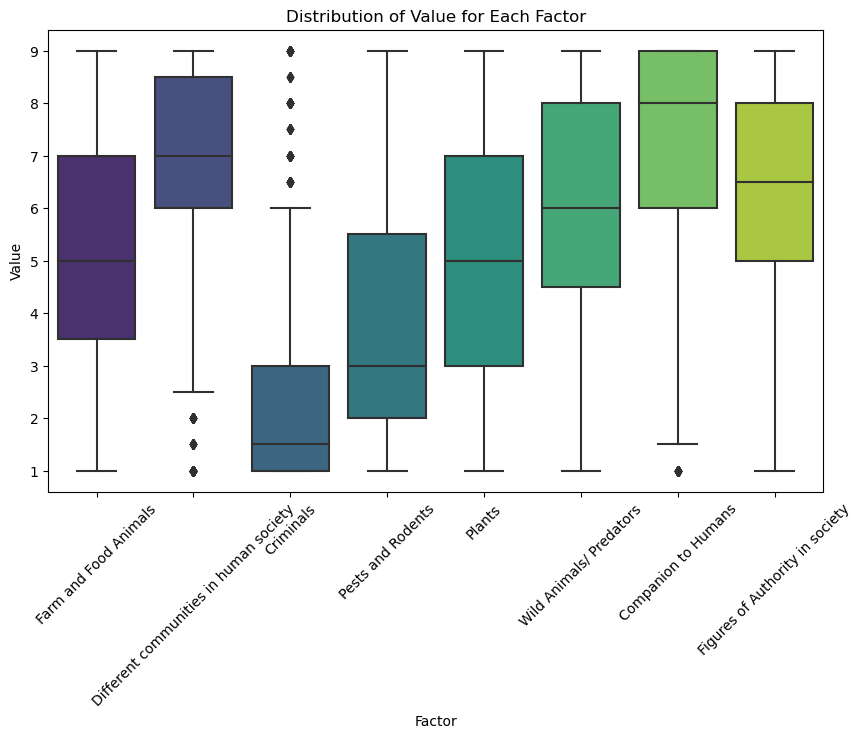

In [136]:
factor_labels = {
    'Factor 1': 'Farm and Food Animals',
    'Factor 2': 'Different communities in human society',
    'Factor 3': 'Criminals',
    'Factor 4': 'Pests and Rodents',
    'Factor 5': 'Plants',
    'Factor 6': 'Wild Animals/ Predators',
    'Factor 7': 'Companion to Humans',
    'Factor 8': 'Figures of Authority in society'
}

# Replace factor names with labels
ratings_df['Factor'] = ratings_df['Factor'].map(factor_labels)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Factor', y='Value', data=ratings_df, palette='viridis')
plt.title('Distribution of Value for Each Factor')
plt.xlabel('Factor')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## Effect of potrayal and stereotypes

In [20]:
positive_portrayed_animals = ["Dog","Cat","Horse","Rabbit","Cow","Pigeon", "Whale", "Lion", "Elephant", "Chimpanzee", "Owl"]
negative_portrayed_animals = ["Pig","Chicken","Goat","Sheep","Shrimp","Fish","Bee","Wasp","Ant","Fly","Octopus","Frog","Worm","Shark","Wolf","Snake","Rat","Spider","Mouse"]

print(len(positive_portrayed_animals), len(negative_portrayed_animals))


11 19


In [21]:
positive_df = animal_df[positive_portrayed_animals]
negative_df = animal_df[negative_portrayed_animals]


positive_df_transposed = positive_df.transpose()
negative_df_transposed = negative_df.transpose()

# Add 'Portrayal' column to transposed dataframes
positive_df_transposed['Portrayal'] = 'Positive'
negative_df_transposed['Portrayal'] = 'Negative'

# Concatenate the transposed dataframes
combined_df_transposed = pd.concat([positive_df_transposed, negative_df_transposed])

# Transpose the concatenated dataframe back to its original orientation
combined_df = combined_df_transposed

combined_df

,0,1,2,3,4,5,6,7,8,9,...,588,589,590,591,593,594,595,596,597,Portrayal
Dog,6.0,8.0,7.5,4.5,8.0,5.0,9.0,9.0,3.0,8.0,...,9.0,9.0,6.5,8.5,7.5,4.5,3.5,9.0,4.5,Positive
Cat,4.5,6.0,8.0,2.5,8.0,6.0,9.0,9.0,3.0,7.5,...,6.0,9.0,4.5,7.5,7.0,4.5,3.0,9.0,4.5,Positive
Horse,3.5,6.0,5.0,5.0,8.0,5.5,9.0,9.0,4.0,7.0,...,6.5,9.0,3.5,6.0,7.0,4.5,3.0,9.0,4.0,Positive
Rabbit,3.0,7.0,5.5,5.0,8.0,4.0,7.0,9.0,3.0,6.0,...,5.5,7.5,2.5,5.5,6.0,4.5,2.0,9.0,3.5,Positive
Cow,3.5,4.5,5.5,3.0,8.0,5.0,8.0,9.0,3.5,6.5,...,6.5,6.5,4.0,5.0,7.0,4.5,2.5,9.0,5.0,Positive
Pigeon,2.0,4.0,5.5,4.5,8.0,3.0,7.0,9.0,2.5,7.0,...,7.0,6.0,2.5,4.5,5.0,4.5,1.5,9.0,3.5,Positive
Whale,5.5,9.0,5.5,5.0,8.0,5.0,9.0,9.0,3.0,7.5,...,6.5,9.0,5.0,5.5,9.0,5.5,3.0,9.0,4.5,Positive
Lion,5.0,7.5,5.5,5.0,8.0,5.5,8.5,9.0,2.5,6.0,...,7.5,9.0,5.5,5.0,7.5,4.5,4.5,9.0,3.5,Positive
Elephant,7.0,8.5,5.5,3.0,8.0,5.5,9.0,9.0,3.0,7.0,...,7.5,9.0,5.0,5.0,8.0,4.5,3.0,9.0,5.0,Positive
Chimpanzee,5.5,8.5,6.5,5.5,8.0,6.0,6.0,9.0,3.5,7.0,...,6.5,9.0,5.0,6.5,9.0,4.5,4.5,9.0,5.0,Positive


In [22]:
melted_df = pd.melt(combined_df, id_vars=['Portrayal'], var_name='Animal', value_name='Moral_Concern_Rating')
melted_df.drop(columns="Animal" ,inplace=True)
print(melted_df)

      Portrayal  Moral_Concern_Rating
0      Positive                   6.0
1      Positive                   4.5
2      Positive                   3.5
3      Positive                   3.0
4      Positive                   3.5
...         ...                   ...
17605  Negative                   4.5
17606  Negative                   3.0
17607  Negative                   3.5
17608  Negative                   2.0
17609  Negative                   3.5

[17610 rows x 2 columns]


In [23]:
positive_group = melted_df[melted_df['Portrayal'] == 'Positive']['Moral_Concern_Rating']
negative_group = melted_df[melted_df['Portrayal'] == 'Negative']['Moral_Concern_Rating']

# Perform the t-test
t_statistic, p_value = ttest_ind(positive_group, negative_group)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 40.32711828800223
P-value: 0.0


### Therefore our result is significant

In [24]:
ratings_Potrayal_0 = melted_df.loc[melted_df['Portrayal'] == "Negative","Moral_Concern_Rating"].values
ratings_Potrayal_1 = melted_df.loc[melted_df['Portrayal'] == "Positive","Moral_Concern_Rating"].values
mean_difference = ratings_Potrayal_1.mean() - ratings_Potrayal_0.mean()

if mean_difference > 0:
    print(f"Positive Potrayal has a higher mean rating than Negative.")
elif mean_difference < 0:
    print(f"Negative potrayal has a higher mean rating than Positive.")

Positive Potrayal has a higher mean rating than Negative.


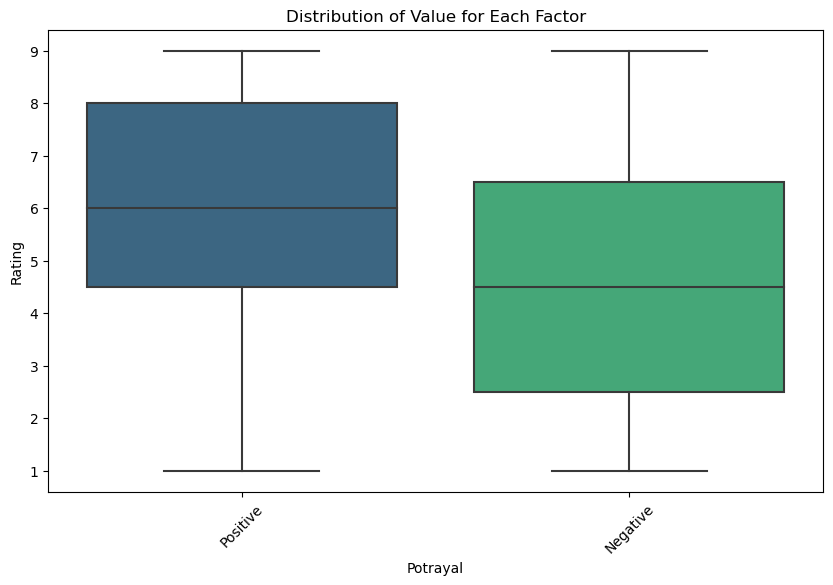

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Portrayal', y='Moral_Concern_Rating', data=melted_df, palette='viridis')
plt.title('Distribution of Value for Each Factor')
plt.xlabel('Potrayal')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## Analysing the Effect of Gender

In [26]:
from scipy import stats

df = data[data['gender'] != 9]
affected_gender=[]
unaffected_gender=[]

for t in targets:
    ratings_gender_0 = data.loc[data['gender'] == 0, t].values
    ratings_gender_1 = data.loc[data['gender'] == 1, t].values
    t_statistic, p_value = stats.ttest_ind(ratings_gender_0, ratings_gender_1)
    # Define significance level
    alpha = 0.05

    if p_value < alpha:
        affected_gender.append(t)
        # Reject the null hypothesis. There is a significant difference between the means of male and female ratings.
    else:
        unaffected_gender.append(t)
        # Fail to reject the null hypothesis. There is no significant difference between the means of male and female ratings.

In [27]:
for t in affected_gender:
    ratings_gender_0 = data.loc[data['gender'] == 0, t].values
    ratings_gender_1 = data.loc[data['gender'] == 1, t].values
    mean_difference = ratings_gender_1.mean() - ratings_gender_0.mean()

    if mean_difference > 0:
        print(f"Male has a higher mean rating than Female for {t}.")
    elif mean_difference < 0:
        print(f"Female has a higher mean rating than Male for {t}.")

Female has a higher mean rating than Male for Dog.
Female has a higher mean rating than Male for Cat.
Female has a higher mean rating than Male for Horse.
Female has a higher mean rating than Male for Rabbit.
Female has a higher mean rating than Male for Cow.
Female has a higher mean rating than Male for Pig.
Female has a higher mean rating than Male for Chicken.
Female has a higher mean rating than Male for Goat.
Female has a higher mean rating than Male for Sheep.
Female has a higher mean rating than Male for Shrimp.
Female has a higher mean rating than Male for Fish.
Female has a higher mean rating than Male for Bee.
Female has a higher mean rating than Male for Ant.
Female has a higher mean rating than Male for Octopus.
Female has a higher mean rating than Male for Frog.
Female has a higher mean rating than Male for Worm.
Female has a higher mean rating than Male for Pigeon.
Female has a higher mean rating than Male for Owl.
Female has a higher mean rating than Male for Whale.
Fema

| Animal / Object                              | Comparison (mean rating)                                           |
|----------------------------------------------|------------------------------------------------------|
| Dog                                          | Female > Male                                        |
| Cat                                          | Female > Male                                        |
| Horse                                        | Female > Male                                        |
| Rabbit                                       | Female > Male                                        |
| Cow                                          | Female > Male                                        |
| Pig                                          | Female > Male                                        |
| Chicken                                      | Female > Male                                        |
| Goat                                         | Female > Male                                        |
| Sheep                                        | Female > Male                                        |
| Shrimp                                       | Female > Male                                        |
| Fish                                         | Female > Male                                        |
| Bee                                          | Female > Male                                        |
| Ant                                          | Female > Male                                        |
| Octopus                                      | Female > Male                                        |
| Frog                                         | Female > Male                                        |
| Worm                                         | Female > Male                                        |
| Pigeon                                       | Female > Male                                        |
| Owl                                          | Female > Male                                        |
| Whale                                        | Female > Male                                        |
| Shark                                        | Female > Male                                        |
| Wolf                                         | Female > Male                                        |
| Snake                                        | Female > Male                                        |
| Rat                                          | Female > Male                                        |
| Mouse                                        | Female > Male                                        |
| Lion                                         | Female > Male                                        |
| Chimpanzee                                   | Female > Male                                        |
| Elephant                                     | Female > Male                                        |
| A family member                              | Female > Male                                        |
| A close friend                               | Female > Male                                        |
| A citizen of the country you live in        | Female > Male                                        |
| Somebody from your neighborhood              | Female > Male                                        |
| A co-worker                                  | Female > Male                                        |
| A foreign citizen                            | Female > Male                                        |
| Somebody with different religious beliefs   | Female > Male                                        |
| The head of state of the country you live in| Female > Male                                        |
| A soldier of the country you live in        | Female > Male                                        |
| A charity worker                             | Female > Male                                        |
| A homosexual person                          | Female > Male                                        |
| A mentally challenged person                 | Female > Male                                        |
| A refugee                                    | Female > Male                                        |
| A redwood tree                               | Female > Male                                        |
| An apple tree                                | Female > Male                                        |
| A rose bush                                  | Female > Male                                        |
| A coral reef                                 | Female > Male                                        |
| Old-growth forest                            | Female > Male                                        |
| The highest mountain in the country you live in| Female > Male                                       |


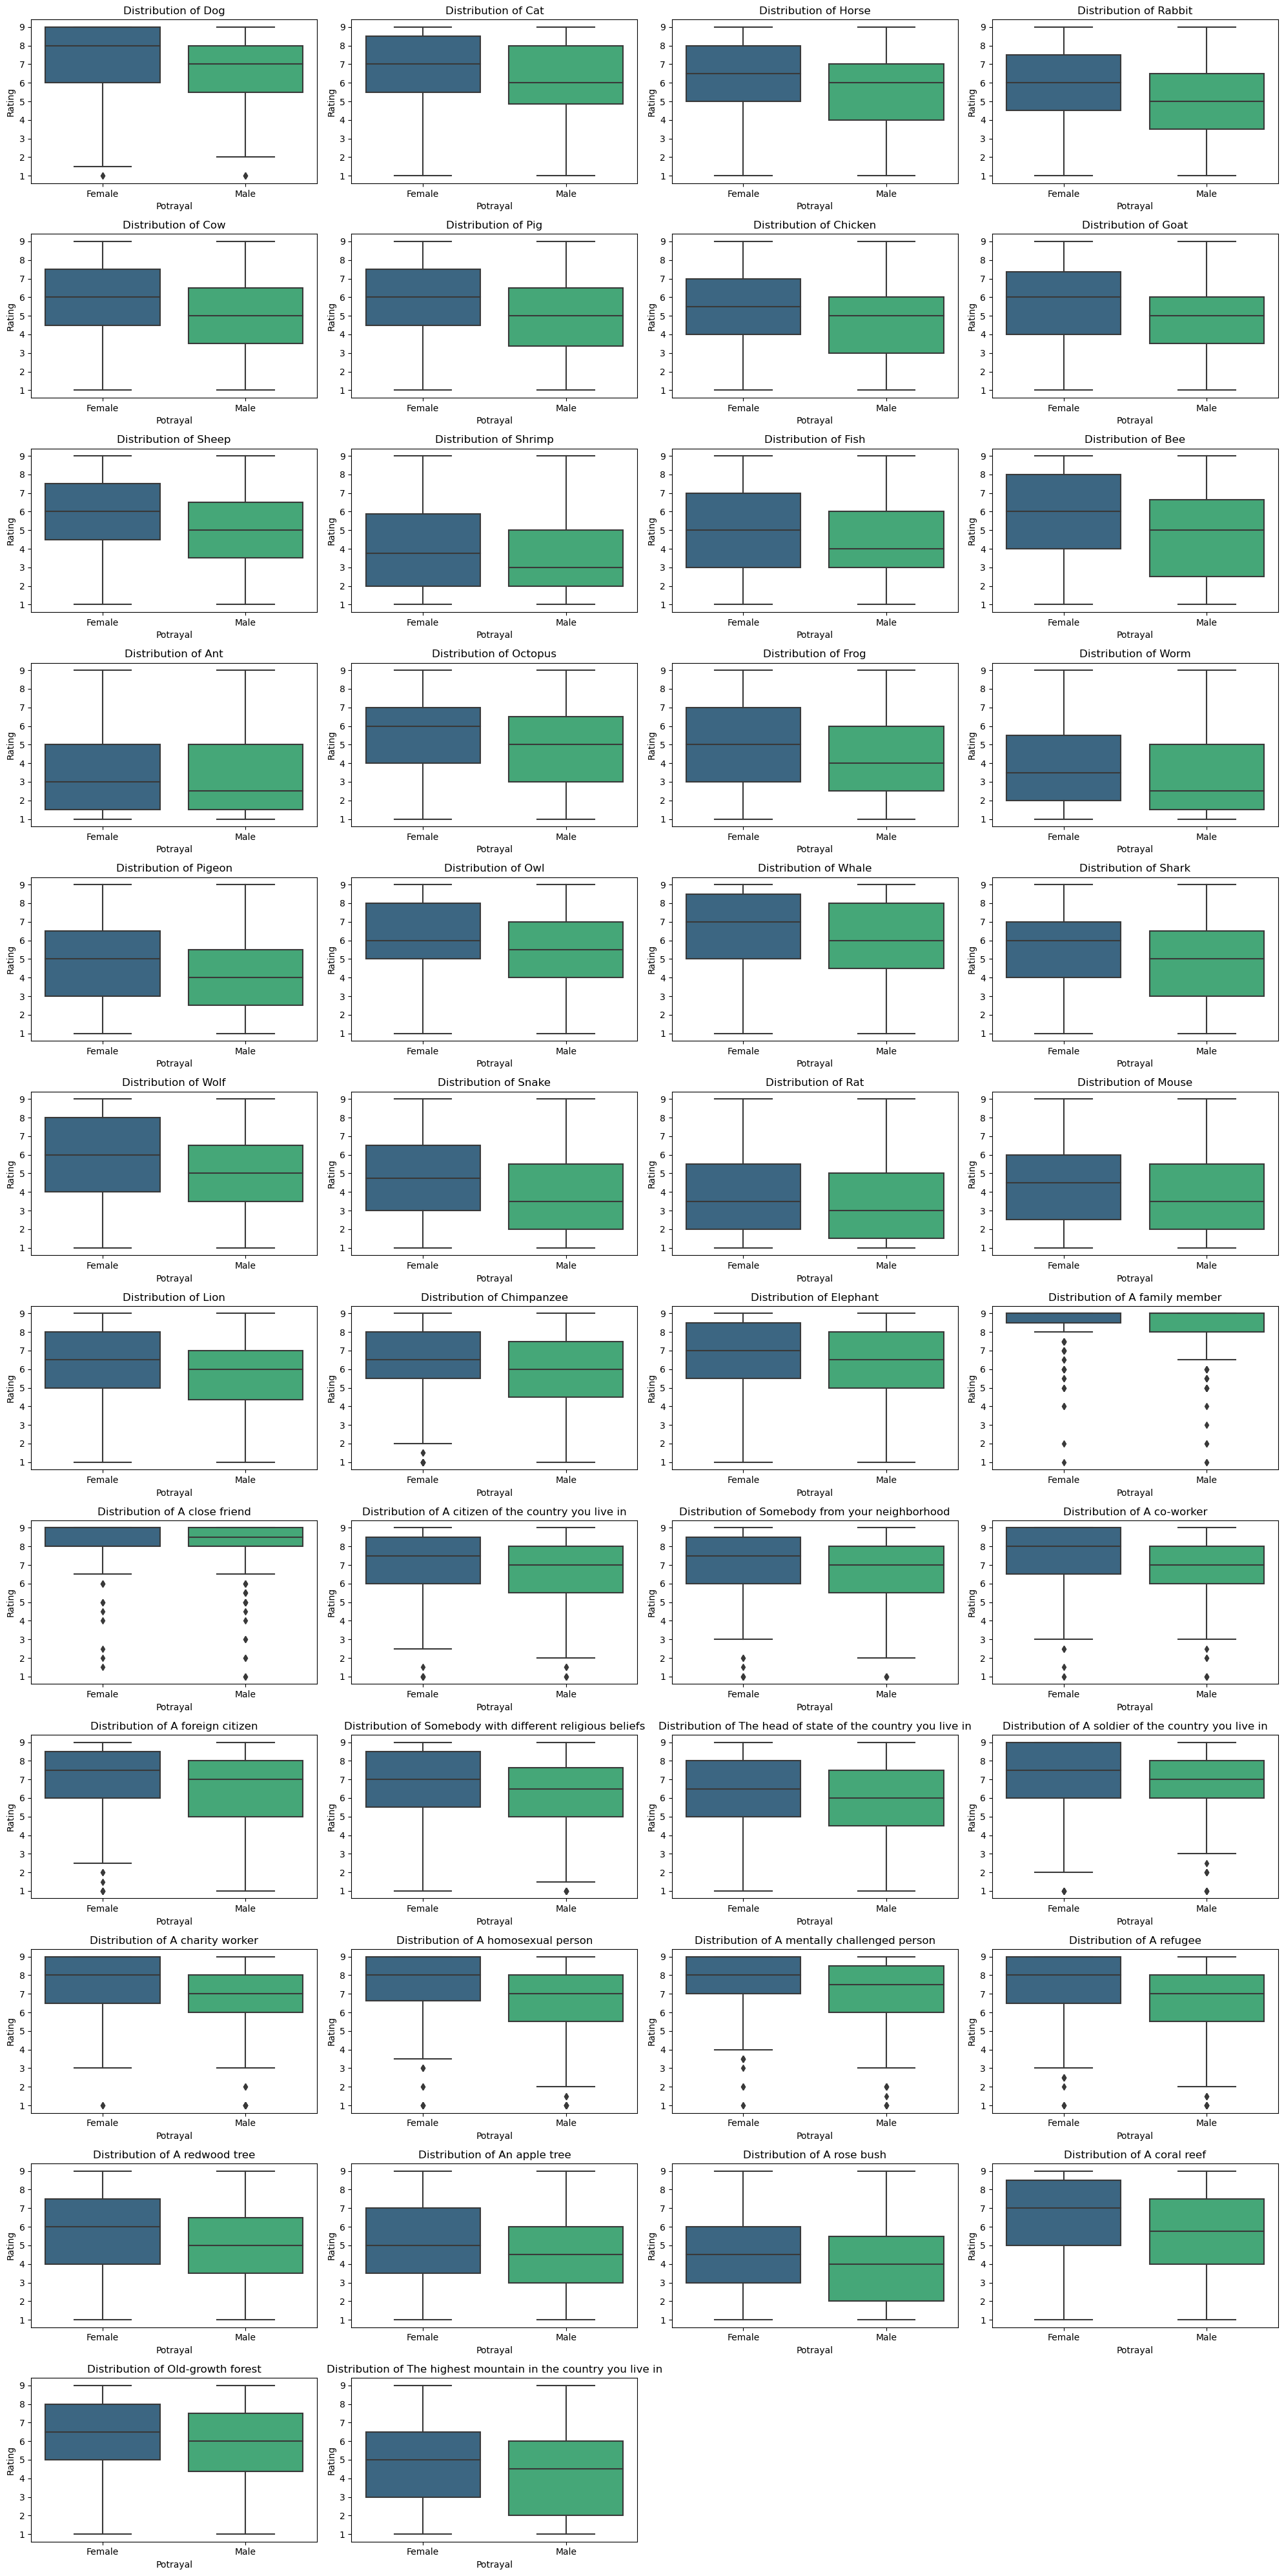

In [28]:
gender_mapping = {0: 'Female', 1: 'Male'}

# Define the number of rows and columns for the grid
num_rows = 12  # Adjust as needed based on the total number of plots
num_cols = 4

# Calculate the total number of subplots
total_plots = len(affected_gender)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over affected genders and create subplots
for i, factor in enumerate(affected_gender):
    # Create a boxplot for the current factor
    sns.boxplot(x='gender', y=factor, data=df.replace({'gender': gender_mapping}), palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {factor.capitalize()}')
    axes[i].set_xlabel('Potrayal')
    axes[i].set_ylabel('Rating')
    axes[i].set_xticklabels(['Female', 'Male'])  # Replace x-labels with mapped values

# Hide any empty subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [29]:
print(unaffected_gender)

['Wasp', 'Fly', 'Spider', 'Your partner/spouse', 'A member of a political party you oppose', 'A murderer', 'A terrorist', 'A child molester']


## Analysing the Effect of Religion

In [30]:
from scipy import stats
affected_religion=[]
unaffected_religion=[]
for t in targets:
    ratings_religion_0 = data.loc[data['religious'] == 0, t].values
    ratings_religion_1 = data.loc[data['religious'] == 1, t].values
    t_statistic, p_value = stats.ttest_ind(ratings_religion_0, ratings_religion_1)

    # Define significance level
    alpha = 0.05

    if p_value < alpha:
        affected_religion.append(t)
        # Reject the null hypothesis. There is a significant difference between the means of male and female ratings.
    else:
        unaffected_religion.append(t)
        # Fail to reject the null hypothesis. There is no significant difference between the means of male and female ratings.

In [31]:
for t in affected_religion:
    ratings_religion_0 = data.loc[data['religious'] == 0, t].values
    ratings_religion_1 = data.loc[data['religious'] == 1, t].values
    mean_difference = ratings_religion_1.mean() - ratings_religion_0.mean()

    if mean_difference > 0:
        print(f"Religious has a higher mean rating than Non-religious for {t}.")
    elif mean_difference < 0:
        print(f"Non-Religious has a higher mean rating than Religious for {t}.")


Non-Religious has a higher mean rating than Religious for Pig.
Religious has a higher mean rating than Non-religious for A citizen of the country you live in.
Religious has a higher mean rating than Non-religious for Somebody from your neighborhood.
Religious has a higher mean rating than Non-religious for A co-worker.
Religious has a higher mean rating than Non-religious for Somebody with different religious beliefs.
Religious has a higher mean rating than Non-religious for The head of state of the country you live in.
Religious has a higher mean rating than Non-religious for A soldier of the country you live in.
Religious has a higher mean rating than Non-religious for A charity worker.
Religious has a higher mean rating than Non-religious for A mentally challenged person.


| Aspect                                        | Comparison(mean rating)                                        |
|-----------------------------------------------|------------------------------------------------------|
| Pig                                           | Non-religious > Religious                            |
| A citizen of the country you live in         | Religious > Non-religious                            |
| Somebody from your neighborhood               | Religious > Non-religious                            |
| A co-worker                                   | Religious > Non-religious                            |
| Somebody with different religious beliefs    | Religious > Non-religious                            |
| The head of state of the country you live in | Religious > Non-religious                            |
| A soldier of the country you live in         | Religious > Non-religious                            |
| A charity worker                              | Religious > Non-religious                            |
| A mentally challenged person                  | Religious > Non-religious                            |


In [32]:
print(unaffected_religion)

['Dog', 'Cat', 'Horse', 'Rabbit', 'Cow', 'Chicken', 'Goat', 'Sheep', 'Shrimp', 'Fish', 'Bee', 'Wasp', 'Ant', 'Fly', 'Octopus', 'Frog', 'Worm', 'Pigeon', 'Owl', 'Whale', 'Shark', 'Wolf', 'Snake', 'Rat', 'Spider', 'Mouse', 'Lion', 'Chimpanzee', 'Elephant', 'A family member', 'A close friend', 'Your partner/spouse', 'A foreign citizen', 'A member of a political party you oppose', 'A homosexual person', 'A refugee', 'A murderer', 'A terrorist', 'A child molester', 'A redwood tree', 'An apple tree', 'A rose bush', 'A coral reef', 'Old-growth forest', 'The highest mountain in the country you live in']


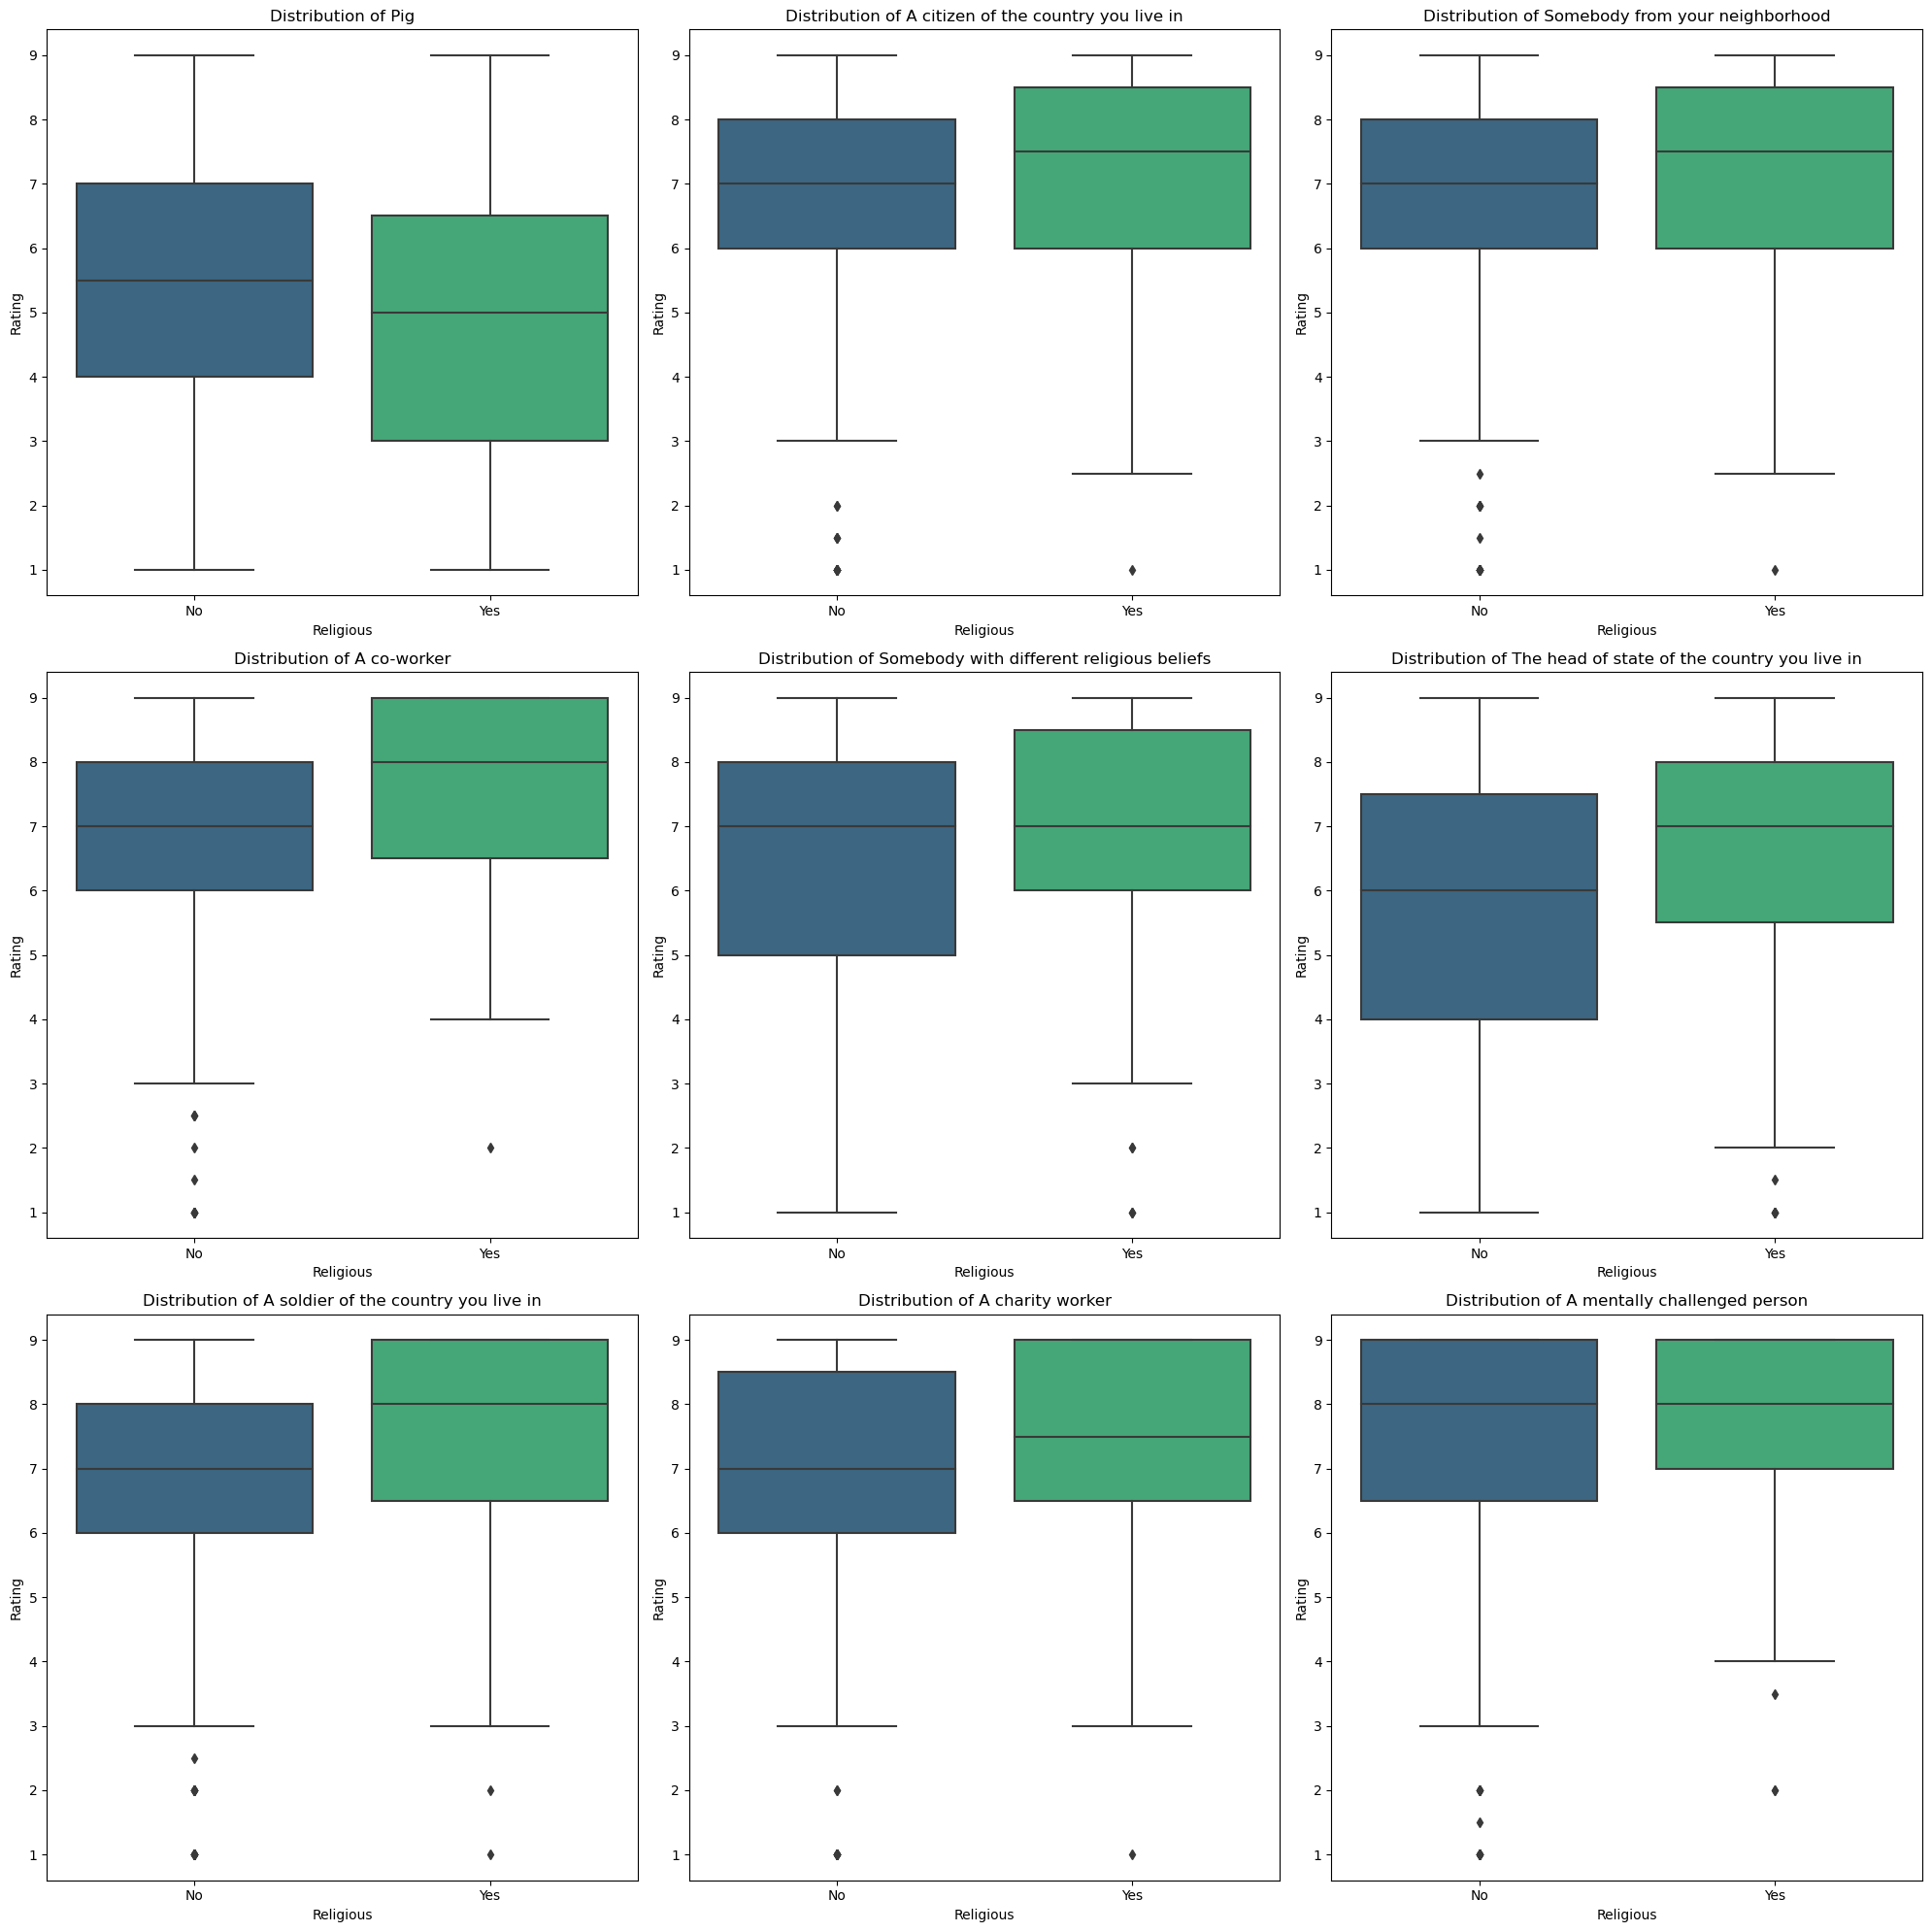

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping of x-labels
religion_mapping = {0: 'No', 1: 'Yes'}

# Define the number of rows and columns for the grid
num_rows = 3  # Adjust as needed based on the total number of plots
num_cols = 3

# Calculate the total number of subplots
total_plots = len(affected_religion)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over affected religions and create subplots
for i, factor in enumerate(affected_religion):
    # Create a boxplot for the current factor
    sns.boxplot(x='religious', y=factor, data=df.replace({'religious': religion_mapping}), palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {factor.capitalize()}')
    axes[i].set_xlabel('Religious')
    axes[i].set_ylabel('Rating')
    axes[i].set_xticklabels(['No', 'Yes'])  # Replace x-labels with mapped values

# Hide any empty subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Analysing effect of political orientation

In [34]:
df = copy.deepcopy(data)

# Define a function to categorize politics
def categorize_politics(politics):
    if politics < 0:
        return 'Left'
    elif politics == 0:
        return 'Neutral'
    else:
        return 'Right'
    
df['political_orientation'] = df['politics'].apply(lambda x: categorize_politics(x))
df.drop('politics', axis=1, inplace=True)
print(df)

     Dog  Cat  Horse  Rabbit  Cow  Pig  Chicken  Goat  Sheep  Shrimp  ...  \
0    6.0  4.5    3.5     3.0  3.5  3.5      3.0   2.5    3.5     2.5  ...   
1    8.0  6.0    6.0     7.0  4.5  6.5      6.0   4.5    5.5     4.0  ...   
2    7.5  8.0    5.0     5.5  5.5  5.0      5.0   5.0    5.5     5.5  ...   
3    4.5  2.5    5.0     5.0  3.0  2.5      3.5   4.5    5.5     3.0  ...   
4    8.0  8.0    8.0     8.0  8.0  8.0      8.0   8.0    8.0     7.0  ...   
..   ...  ...    ...     ...  ...  ...      ...   ...    ...     ...  ...   
593  7.5  7.0    7.0     6.0  7.0  5.5      5.5   6.5    5.5     5.0  ...   
594  4.5  4.5    4.5     4.5  4.5  4.5      4.5   4.5    4.5     4.5  ...   
595  3.5  3.0    3.0     2.0  2.5  3.0      1.0   2.5    2.5     1.0  ...   
596  9.0  9.0    9.0     9.0  9.0  9.0      9.0   9.0    9.0     9.0  ...   
597  4.5  4.5    4.0     3.5  5.0  5.0      3.5   4.0    4.5     3.0  ...   

     reduce_meat_10  diet  breakfast_meat  lunch_meat  dinner_meat  age  \


In [35]:
from scipy.stats import kstest

for t in targets:
    # Extract data for each political orientation
    data_left = df[df['political_orientation'] == 'Left'][t]
    data_neutral = df[df['political_orientation'] == 'Neutral'][t]
    data_right = df[df['political_orientation'] == 'Right'][t]
    
    # Perform the Kolmogorov-Smirnov test for normality
    ks_test_left = kstest(data_left, 'norm')
    ks_test_neutral = kstest(data_neutral, 'norm')
    ks_test_right = kstest(data_right, 'norm')
    
    # Print the variable names for which normality assumption holds
    if ks_test_left.pvalue > 0.05:
        print(f"Normality assumption holds for '{t}' in the Left political orientation.")
    if ks_test_neutral.pvalue > 0.05:
        print(f"Normality assumption holds for '{t}' in the Neutral political orientation.")
    if ks_test_right.pvalue > 0.05:
        print(f"Normality assumption holds for '{t}' in the Right political orientation.")


` According to results obtained in Kolmogrov-Smiroff test normalcy is violated by all the entities. Thus we apply Kruskal Wallis Test`

In [36]:
affected_politics = []
unaffected_politics = []

for t in targets:
    # Apply Kruskal-Wallis test
    kruskal_result = pg.kruskal(data=df, dv=t, between='political_orientation')
    if kruskal_result['p-unc'].iloc[0] < 0.05:  # Check if p-value is less than 0.05
        affected_politics.append(t)  # Add to affected_politics list
    else:
        unaffected_politics.append(t)  # Add to unaffected_politics list

print("Affected Politics:", affected_politics)
print("Unaffected Politics:", unaffected_politics)

Affected Politics: ['Dog', 'Cat', 'Horse', 'Rabbit', 'Cow', 'Pig', 'Chicken', 'Goat', 'Sheep', 'Shrimp', 'Bee', 'Fly', 'Octopus', 'Frog', 'Pigeon', 'Owl', 'Whale', 'Shark', 'Wolf', 'Snake', 'Rat', 'Mouse', 'Lion', 'Chimpanzee', 'Elephant', 'A close friend', 'Your partner/spouse', 'A citizen of the country you live in', 'Somebody from your neighborhood', 'A co-worker', 'A foreign citizen', 'A member of a political party you oppose', 'Somebody with different religious beliefs', 'The head of state of the country you live in', 'A soldier of the country you live in', 'A charity worker', 'A homosexual person', 'A mentally challenged person', 'A refugee', 'A murderer', 'A terrorist', 'A child molester', 'A redwood tree', 'A coral reef', 'Old-growth forest']
Unaffected Politics: ['Fish', 'Wasp', 'Ant', 'Worm', 'Spider', 'A family member', 'An apple tree', 'A rose bush', 'The highest mountain in the country you live in']


In [37]:
for column in affected_politics:
    print("\nFor", column)
    # Apply Games-Howell test
    posthoc_test = pg.pairwise_tests(
        data=df,
        dv=column,
        between='political_orientation',
        padjust="holm"
    )
    for index, row in posthoc_test.iterrows():
        group_a = row['A']
        group_b = row['B']
        t_value = row['T']
        try:
            p_val = row['p-unc']
        except KeyError:
            p_val = row['pval']
        
        # Print the inference based on the p-value
        if p_val < 0.05:
            if t_value > 0:
                print(f"The mean of group '{group_a}' is significantly higher than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
            elif t_value < 0:
                print(f"The mean of group '{group_a}' is significantly lower than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
            else:
                print(f"There is no significant difference between the means of group '{group_a}' and group '{group_b}' (T = {t_value}, p = {p_val}).")



For Dog
The mean of group 'Left' is significantly higher than the mean of group 'Neutral' (T = 3.3273275885032985, p = 0.000986351496624586).

For Cat
The mean of group 'Left' is significantly higher than the mean of group 'Neutral' (T = 3.6729713036980343, p = 0.0002834160491879989).
The mean of group 'Left' is significantly higher than the mean of group 'Right' (T = 2.091032279663765, p = 0.03843908405722952).

For Horse
The mean of group 'Left' is significantly higher than the mean of group 'Neutral' (T = 3.644249329695951, p = 0.00031521425429068407).
The mean of group 'Neutral' is significantly lower than the mean of group 'Right' (T = -2.0336341901174135, p = 0.043376472949589844).

For Rabbit
The mean of group 'Left' is significantly higher than the mean of group 'Neutral' (T = 3.124884927368851, p = 0.0019356019880849918).
The mean of group 'Left' is significantly higher than the mean of group 'Right' (T = 2.4470898261187477, p = 0.015605859567691912).

For Cow
The mean of gro

| Animal         | Comparison                                   | T-value | p-value      |
|----------------|----------------------------------------------|---------|--------------|
| Dog            | Left > Neutral                              | 3.33    | 0.00099      |
| Cat            | Left > Neutral                              | 3.67    | 0.00028      |
| Cat            | Left > Right                                | 2.09    | 0.038        |
| Horse          | Left > Neutral                              | 3.64    | 0.00032      |
| Horse          | Neutral < Right                             | -2.03   | 0.043        |
| Rabbit         | Left > Neutral                              | 3.12    | 0.00194      |
| Rabbit         | Left > Right                                | 2.45    | 0.01561      |
| Cow            | Left > Neutral                              | 3.06    | 0.00242      |
| Pig            | Left > Neutral                              | 3.59    | 0.00038      |
| Pig            | Left > Right                                | 3.10    | 0.00236      |
| Chicken        | Left > Neutral                              | 2.39    | 0.01757      |
| Goat           | Left > Neutral                              | 3.38    | 0.00082      |
| Goat           | Left > Right                                | 3.04    | 0.00284      |
| Sheep          | Left > Neutral                              | 3.75    | 0.00021      |
| Shrimp         | Left > Right                                | 2.63    | 0.00942      |
| Bee            | Left > Neutral                              | 3.18    | 0.00160      |
| Fly            | Left > Right                                | 2.29    | 0.02354      |
| Octopus        | Left > Neutral                              | 4.54    | 0.00001      |
| Octopus        | Left > Right                                | 3.24    | 0.00148      |
| Frog           | Left > Neutral                              | 2.69    | 0.00759      |
| Frog           | Left > Right                                | 2.23    | 0.02753      |
| Pigeon         | Left > Neutral                              | 3.11    | 0.00201      |
| Pigeon         | Left > Right                                | 2.32    | 0.02158      |
| Owl            | Left > Neutral                              | 3.43    | 0.00067      |
| Owl            | Left > Right                                | 2.15    | 0.03344      |
| Whale          | Left > Neutral                              | 4.06    | 0.00006      |
| Whale          | Left > Right                                | 2.02    | 0.04530      |
| Shark          | Left > Neutral                              | 4.25    | 0.00003      |
| Shark          | Left > Right                                | 2.45    | 0.01544      |
| Wolf           | Left > Neutral                              | 4.23    | 0.00003      |
| Wolf           | Left > Right                                | 2.32    | 0.02168      |
| Snake          | Left > Neutral                              | 4.14    | 0.00004      |
| Snake          | Left > Right                                | 3.07    | 0.00254      |
| Rat            | Left > Neutral                              | 4.74    | 0.00000      |
| Rat            | Left > Right                                | 4.51    | 0.00001      |
| Mouse          | Left > Neutral                              | 3.50    | 0.00052      |
| Mouse          | Left > Right                                | 3.96    | 0.00012      |
| Lion           | Left > Neutral                              | 3.33    | 0.00097      |
| Chimpanzee     | Left > Neutral                              | 4.36    | 0.00002      |
| Chimpanzee     | Left > Right                                | 2.41    | 0.01714      |
| Elephant       | Left > Neutral                              | 3.14    | 0.00187      |
| A close friend | Left > Neutral                              | 2.40    | 0.01705      |
| Your partner/spouse | Neutral < Right                       | -2.51   | 0.01266      |
| A citizen of the country you live in | Left > Neutral | 3.76 | 0.00021 |
| A citizen of the country you live in | Left > Right | 2.06 | 0.04071 |
| Somebody from your neighborhood | Left > Neutral | 3.68 | 0.00028 |
| Somebody from your neighborhood | Left > Right | 3.07 | 0.00259 |
| A co-worker | Left > Neutral | 3.23 | 0.00141 |
| A foreign citizen | Left > Neutral | 5.82 | 0.00000 |
| A foreign citizen | Left > Right | 5.37 | 0.00000 |
| A member of a political party you oppose | Left > Neutral | 2.78 | 0.00572 |
| Somebody with different religious beliefs | Left > Neutral | 4.49 | 0.00001 |
| Somebody with different religious beliefs | Left > Right | 4.28 | 0.00004 |
| The head of state of the country you live in | Left > Neutral | 2.11 | 0.03587 |
| The head of state of the country you live in | Neutral < Right | -3.08 | 0.00237 |
| A soldier of the country you live in | Left < Right | -3.37 | 0.00091 |
| A soldier of the country you live in | Neutral < Right | -3.09 | 0.00226 |
| A charity worker | Left > Neutral | 4.77 | 0.00000 |
| A charity worker | Left > Right | 2.90 | 0.00443 |
| A homosexual person | Left > Neutral | 6.63 | 0.00000 |
| A homosexual person | Left > Right | 5.69 | 0.00000 |
| A mentally challenged person | Left > Neutral | 4.68 | 0.00000 |
| A mentally challenged person | Left > Right | 3.85 | 0.00019 |
| A refugee | Left > Neutral | 6.68 | 0.00000 |
| A refugee | Left > Right | 6.64 | 0.00000 |
| A murderer | Left > Neutral | 4.76 | 0.00000 |
| A murderer | Left > Right | 6.12 | 0.00000 |
| A terrorist | Left > Neutral | 4.92 | 0.00000 |
| A terrorist | Left > Right | 6.32 | 0.00000 |
| A child molester | Left > Neutral | 2.93 | 0.00363 |
| A child molester | Left > Right | 4.10 | 0.00006 |
| A redwood tree | Left > Neutral | 3.36 | 0.00088 |
| A redwood tree | Neutral < Right | -1.98 | 0.04881 |
| A coral reef | Left > Neutral | 4.59 | 0.00001 |
| A coral reef | Left > Right | 2.62 | 0.00996 |
| Old-growth forest | Left > Neutral | 4.13 | 0.00005 |


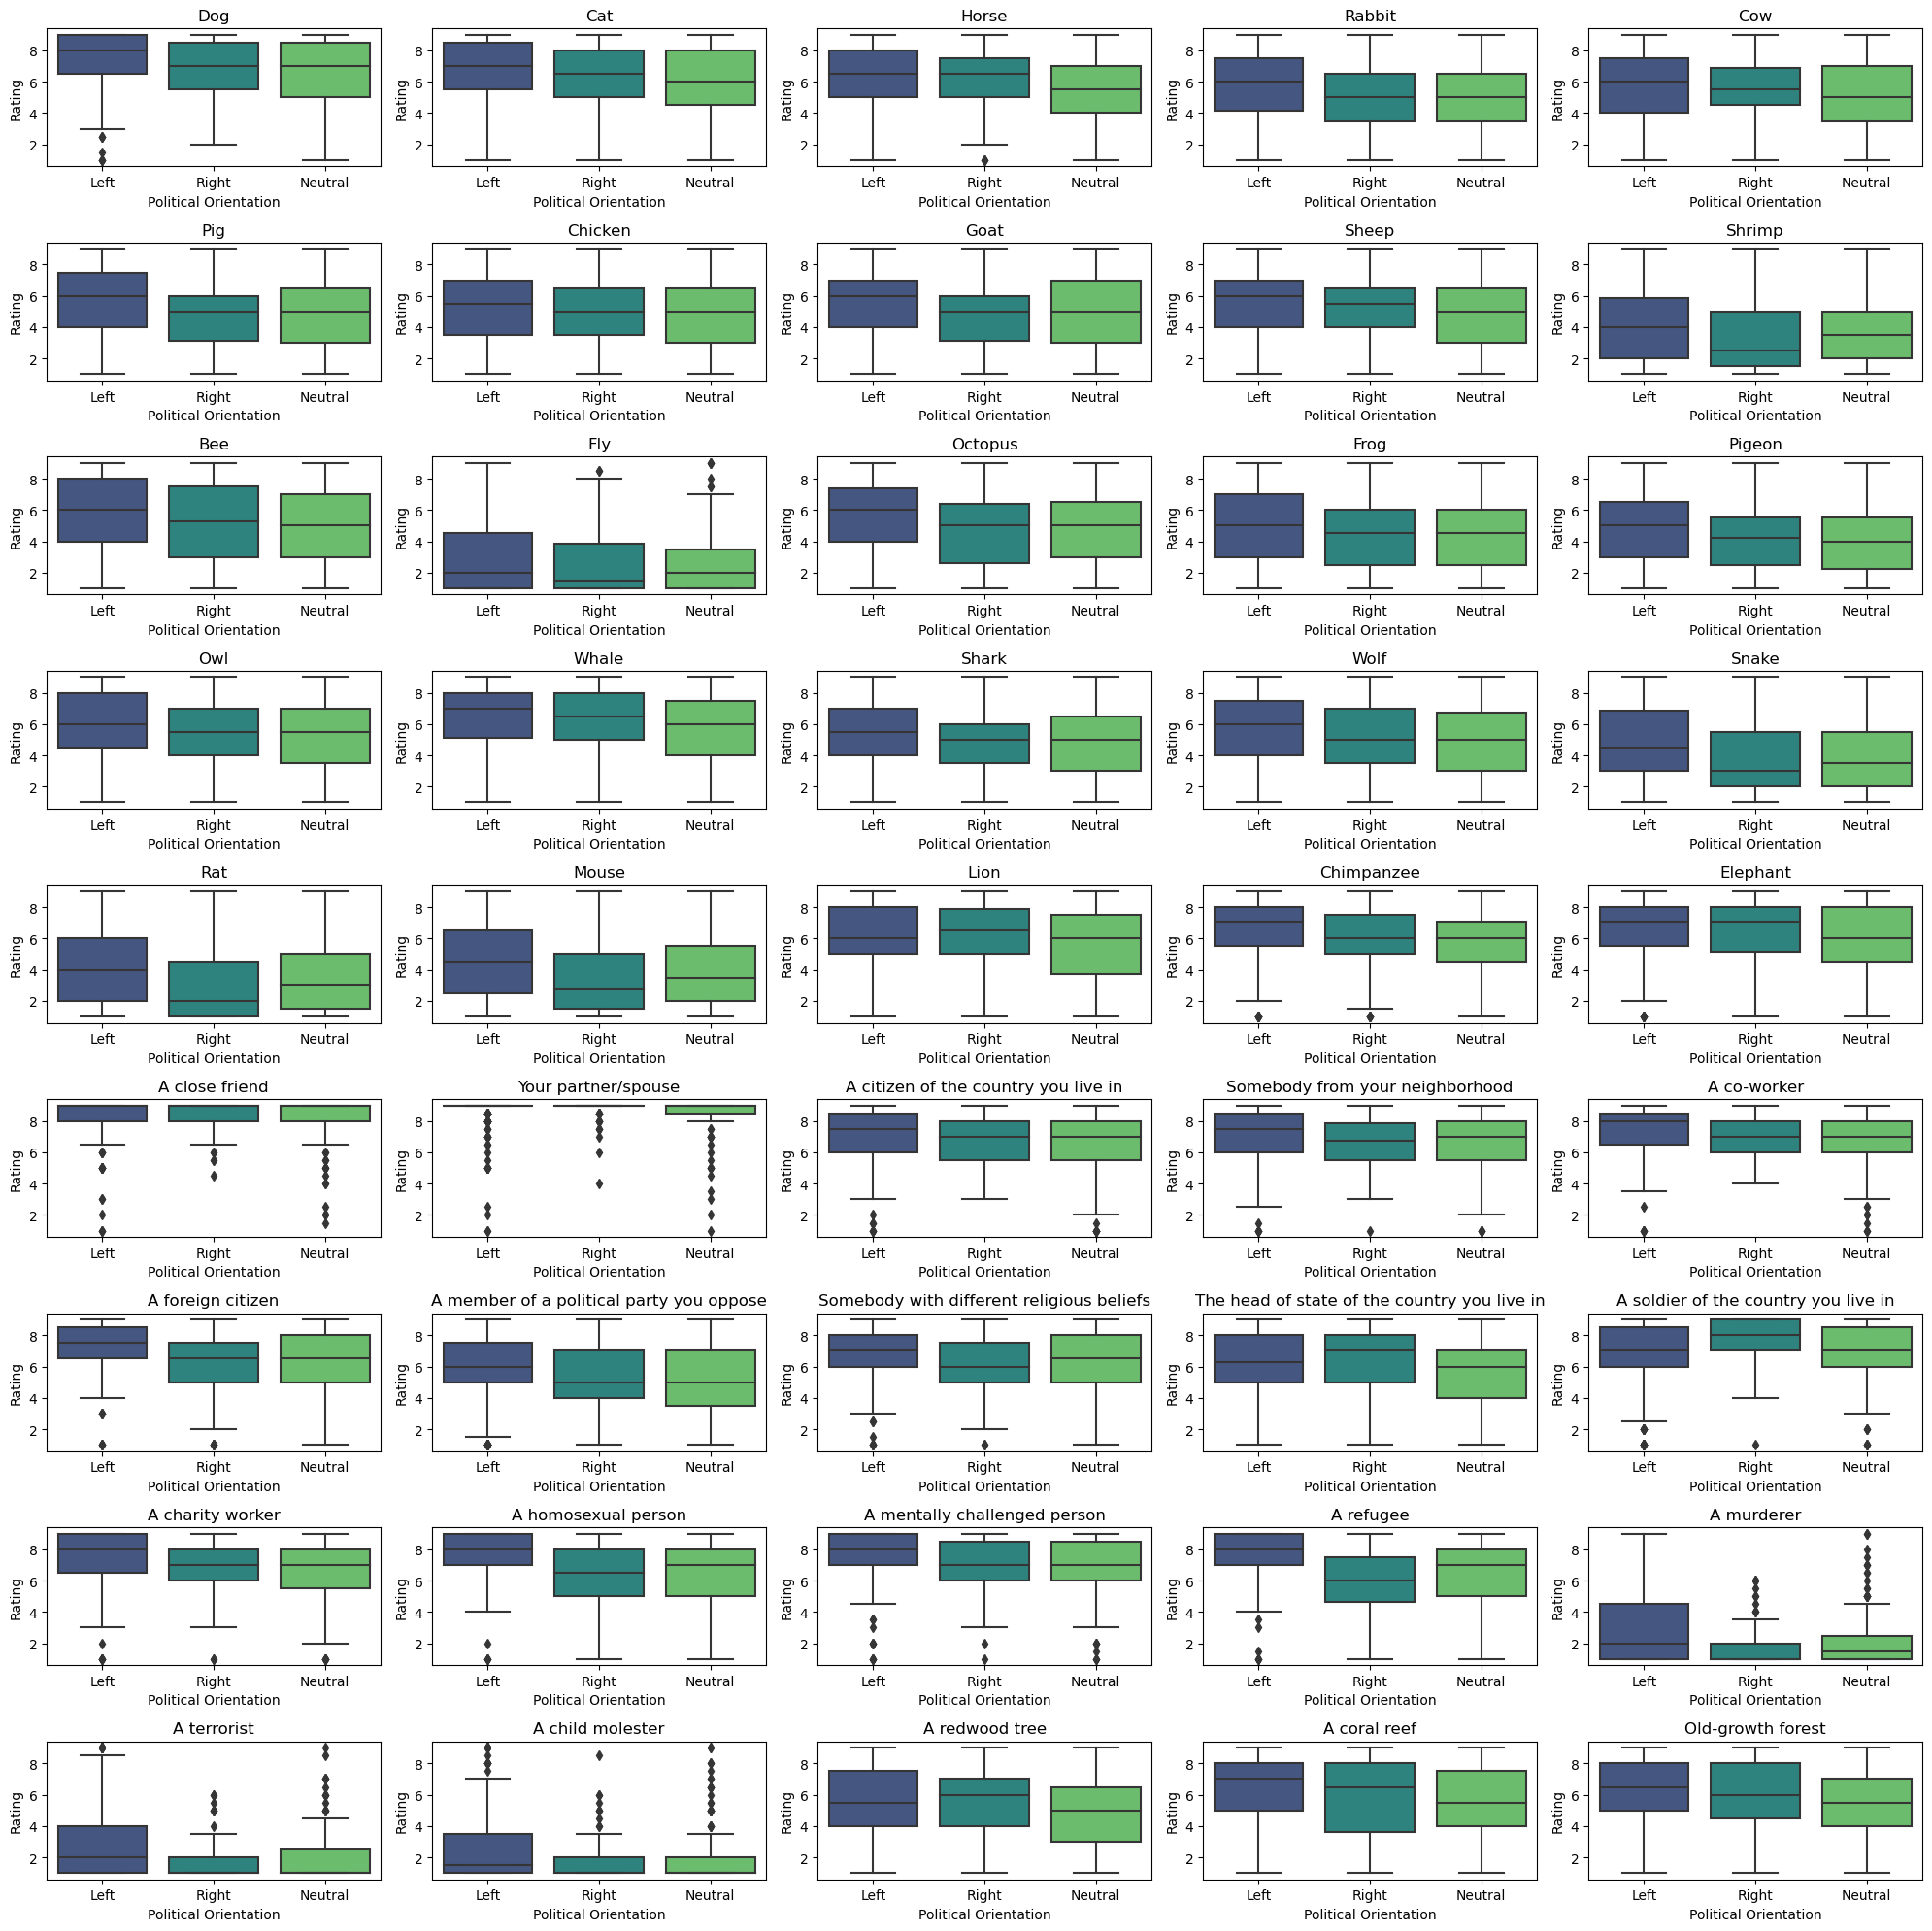

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 9  # Adjust as needed based on the total number of plots
num_cols = 5

# Calculate the total number of subplots
total_plots = len(affected_politics)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over affected affected_politicss and create subplots
for i, factor in enumerate(affected_politics):
    # Create a boxplot for the current factor
    sns.boxplot(x='political_orientation', y=factor, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{factor.capitalize()}')
    axes[i].set_xlabel('Political Orientation')
    axes[i].set_ylabel('Rating') # Replace x-labels with mapped values

# Hide any empty subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Analysing effect of age

In [39]:
print(data["age"].describe())

count    587.000000
mean      35.221465
std       13.157306
min       18.000000
25%       25.000000
50%       32.000000
75%       43.500000
max       86.000000
Name: age, dtype: float64


In [40]:
df = copy.deepcopy(data)
def categorize_age(age):
    if age < 25:
        return 'Young'
    elif age < 40:
        return 'Adult'
    else:
        return 'Elderly'

df['age_group'] = df['age'].apply(lambda x: categorize_age(x))

# Drop the original 'age' column
df.drop('age', axis=1, inplace=True)

# Print the DataFrame with the new 'age_group' column
print(df)


     Dog  Cat  Horse  Rabbit  Cow  Pig  Chicken  Goat  Sheep  Shrimp  ...  \
0    6.0  4.5    3.5     3.0  3.5  3.5      3.0   2.5    3.5     2.5  ...   
1    8.0  6.0    6.0     7.0  4.5  6.5      6.0   4.5    5.5     4.0  ...   
2    7.5  8.0    5.0     5.5  5.5  5.0      5.0   5.0    5.5     5.5  ...   
3    4.5  2.5    5.0     5.0  3.0  2.5      3.5   4.5    5.5     3.0  ...   
4    8.0  8.0    8.0     8.0  8.0  8.0      8.0   8.0    8.0     7.0  ...   
..   ...  ...    ...     ...  ...  ...      ...   ...    ...     ...  ...   
593  7.5  7.0    7.0     6.0  7.0  5.5      5.5   6.5    5.5     5.0  ...   
594  4.5  4.5    4.5     4.5  4.5  4.5      4.5   4.5    4.5     4.5  ...   
595  3.5  3.0    3.0     2.0  2.5  3.0      1.0   2.5    2.5     1.0  ...   
596  9.0  9.0    9.0     9.0  9.0  9.0      9.0   9.0    9.0     9.0  ...   
597  4.5  4.5    4.0     3.5  5.0  5.0      3.5   4.0    4.5     3.0  ...   

     reduce_meat_10  diet  breakfast_meat  lunch_meat  dinner_meat  gender 

In [41]:
from scipy.stats import kstest

for t in targets:
    # Extract data for each political orientation
    data_young = df[df['age_group'] == 'Young'][t]
    data_adult = df[df['age_group'] == 'Adult'][t]
    data_elderly = df[df['age_group'] == 'Elderly'][t]
    
    # Perform the Kolmogorov-Smirnov test for normality
    ks_test_young = kstest(data_young, 'norm')
    ks_test_adult = kstest(data_adult, 'norm')
    ks_test_elderly = kstest(data_elderly, 'norm')
    
    # Print the variable names for which normality assumption holds
    if ks_test_young.pvalue > 0.05:
        print(f"Normality assumption holds for '{t}' in the young political orientation.")
    if ks_test_adult.pvalue > 0.05:
        print(f"Normality assumption holds for '{t}' in the adult political orientation.")
    if ks_test_elderly.pvalue > 0.05:
        print(f"Normality assumption holds for '{t}' in the elderly political orientation.")


` According to results obtained in Kolmogrov-Smiroff test normalcy is violated by all the entities. Thus we apply Kruskal Wallis Test.`

In [42]:
affected_age = []
unaffected_age = []

for t in targets:
    kruskal_result = pg.kruskal(data=df, dv=t, between='age_group')
    if kruskal_result['p-unc'].iloc[0] < 0.05: 
        affected_age.append(t) 
    else:
        unaffected_age.append(t)  # Add to unaffected_politics list

print("Affected age:", affected_age)
print("Unaffected age:", unaffected_age)


Affected age: ['Horse', 'Cow', 'Pig', 'Goat', 'Bee', 'Owl', 'Whale', 'Wolf', 'Spider', 'Lion', 'Chimpanzee', 'Elephant', 'The head of state of the country you live in', 'A soldier of the country you live in', 'A redwood tree', 'An apple tree', 'Old-growth forest']
Unaffected age: ['Dog', 'Cat', 'Rabbit', 'Chicken', 'Sheep', 'Shrimp', 'Fish', 'Wasp', 'Ant', 'Fly', 'Octopus', 'Frog', 'Worm', 'Pigeon', 'Shark', 'Snake', 'Rat', 'Mouse', 'A family member', 'A close friend', 'Your partner/spouse', 'A citizen of the country you live in', 'Somebody from your neighborhood', 'A co-worker', 'A foreign citizen', 'A member of a political party you oppose', 'Somebody with different religious beliefs', 'A charity worker', 'A homosexual person', 'A mentally challenged person', 'A refugee', 'A murderer', 'A terrorist', 'A child molester', 'A rose bush', 'A coral reef', 'The highest mountain in the country you live in']


In [43]:
for column in affected_age:
    print("\nFor", column)
    posthoc_test = pg.pairwise_tests(
        data=df,
        dv=column,
        between='age_group',
        padjust="holm"
    )
    for index, row in posthoc_test.iterrows():
        group_a = row['A']
        group_b = row['B']
        t_value = row['T']
        try:
            p_val = row['p-unc']
        except KeyError:
            p_val = row['pval']
        
        # Print the inference based on the p-value
        if p_val < 0.05:
            if t_value > 0:
                print(f"The mean of group '{group_a}' is significantly higher than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
            elif t_value < 0:
                print(f"The mean of group '{group_a}' is significantly lower than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
            else:
                print(f"There is no significant difference between the means of group '{group_a}' and group '{group_b}' (T = {t_value}, p = {p_val}).")



For Horse
The mean of group 'Adult' is significantly lower than the mean of group 'Elderly' (T = -2.6571756725743225, p = 0.008180231449415595).
The mean of group 'Elderly' is significantly higher than the mean of group 'Young' (T = 3.510109746406279, p = 0.000525577226187585).

For Cow
The mean of group 'Adult' is significantly lower than the mean of group 'Elderly' (T = -2.465167871358239, p = 0.01410412156503325).
The mean of group 'Elderly' is significantly higher than the mean of group 'Young' (T = 2.6849290684757063, p = 0.007692395292380888).

For Pig
The mean of group 'Adult' is significantly lower than the mean of group 'Elderly' (T = -1.9941924360408634, p = 0.046786809572017155).
The mean of group 'Elderly' is significantly higher than the mean of group 'Young' (T = 3.1132564255035398, p = 0.002040816889435688).

For Goat
The mean of group 'Adult' is significantly lower than the mean of group 'Elderly' (T = -2.4520414570546794, p = 0.01462945897421188).
The mean of group 'E

| Animal             | Comparison                                   | T-value | p-value      |
|--------------------|----------------------------------------------|---------|--------------|
| Horse              | Adult < Elderly                             | -2.66   | 0.00818      |
| Horse              | Elderly > Young                             | 3.51    | 0.00053      |
| Cow                | Adult < Elderly                             | -2.47   | 0.01410      |
| Cow                | Elderly > Young                             | 2.68    | 0.00769      |
| Pig                | Adult < Elderly                             | -1.99   | 0.04679      |
| Pig                | Elderly > Young                             | 3.11    | 0.00204      |
| Goat               | Adult < Elderly                             | -2.45   | 0.01463      |
| Goat               | Elderly > Young                             | 2.27    | 0.02417      |
| Bee                | Adult < Elderly                             | -3.05   | 0.00242      |
| Bee                | Elderly > Young                             | 2.22    | 0.02731      |
| Owl                | Adult < Elderly                             | -2.63   | 0.00876      |
| Owl                | Elderly > Young                             | 2.99    | 0.00304      |
| Whale              | Adult < Elderly                             | -2.90   | 0.00397      |
| Whale              | Elderly > Young                             | 3.42    | 0.00073      |
| Wolf               | Adult < Elderly                             | -1.98   | 0.04875      |
| Wolf               | Elderly > Young                             | 2.37    | 0.01829      |
| Spider             | Adult < Elderly                             | -2.50   | 0.01301      |
| Spider             | Elderly > Young                             | 2.88    | 0.00421      |
| Lion               | Adult < Elderly                             | -3.32   | 0.00098      |
| Lion               | Elderly > Young                             | 4.52    | 0.00001      |
| Chimpanzee         | Adult < Elderly                             | -3.42   | 0.00068      |
| Chimpanzee         | Elderly > Young                             | 4.00    | 0.00008      |
| Elephant           | Adult < Elderly                             | -2.99   | 0.00292      |
| Elephant           | Elderly > Young                             | 3.28    | 0.00117      |
| The head of state of the country you live in | Adult < Elderly | -2.18 | 0.02953 |
| A soldier of the country you live in | Adult < Elderly | -3.35 | 0.00088 |
| A soldier of the country you live in | Elderly > Young | 3.58 | 0.00041 |
| A redwood tree     | Adult < Elderly                             | -3.93   | 0.00010      |
| A redwood tree     | Elderly > Young                             | 4.01    | 0.00008      |
| An apple tree      | Adult < Elderly                             | -2.47   | 0.01406      |
| Old-growth forest  | Adult < Elderly                             | -2.32   | 0.02077      |
| Old-growth forest  | Elderly > Young                             | 2.19    | 0.02952      |


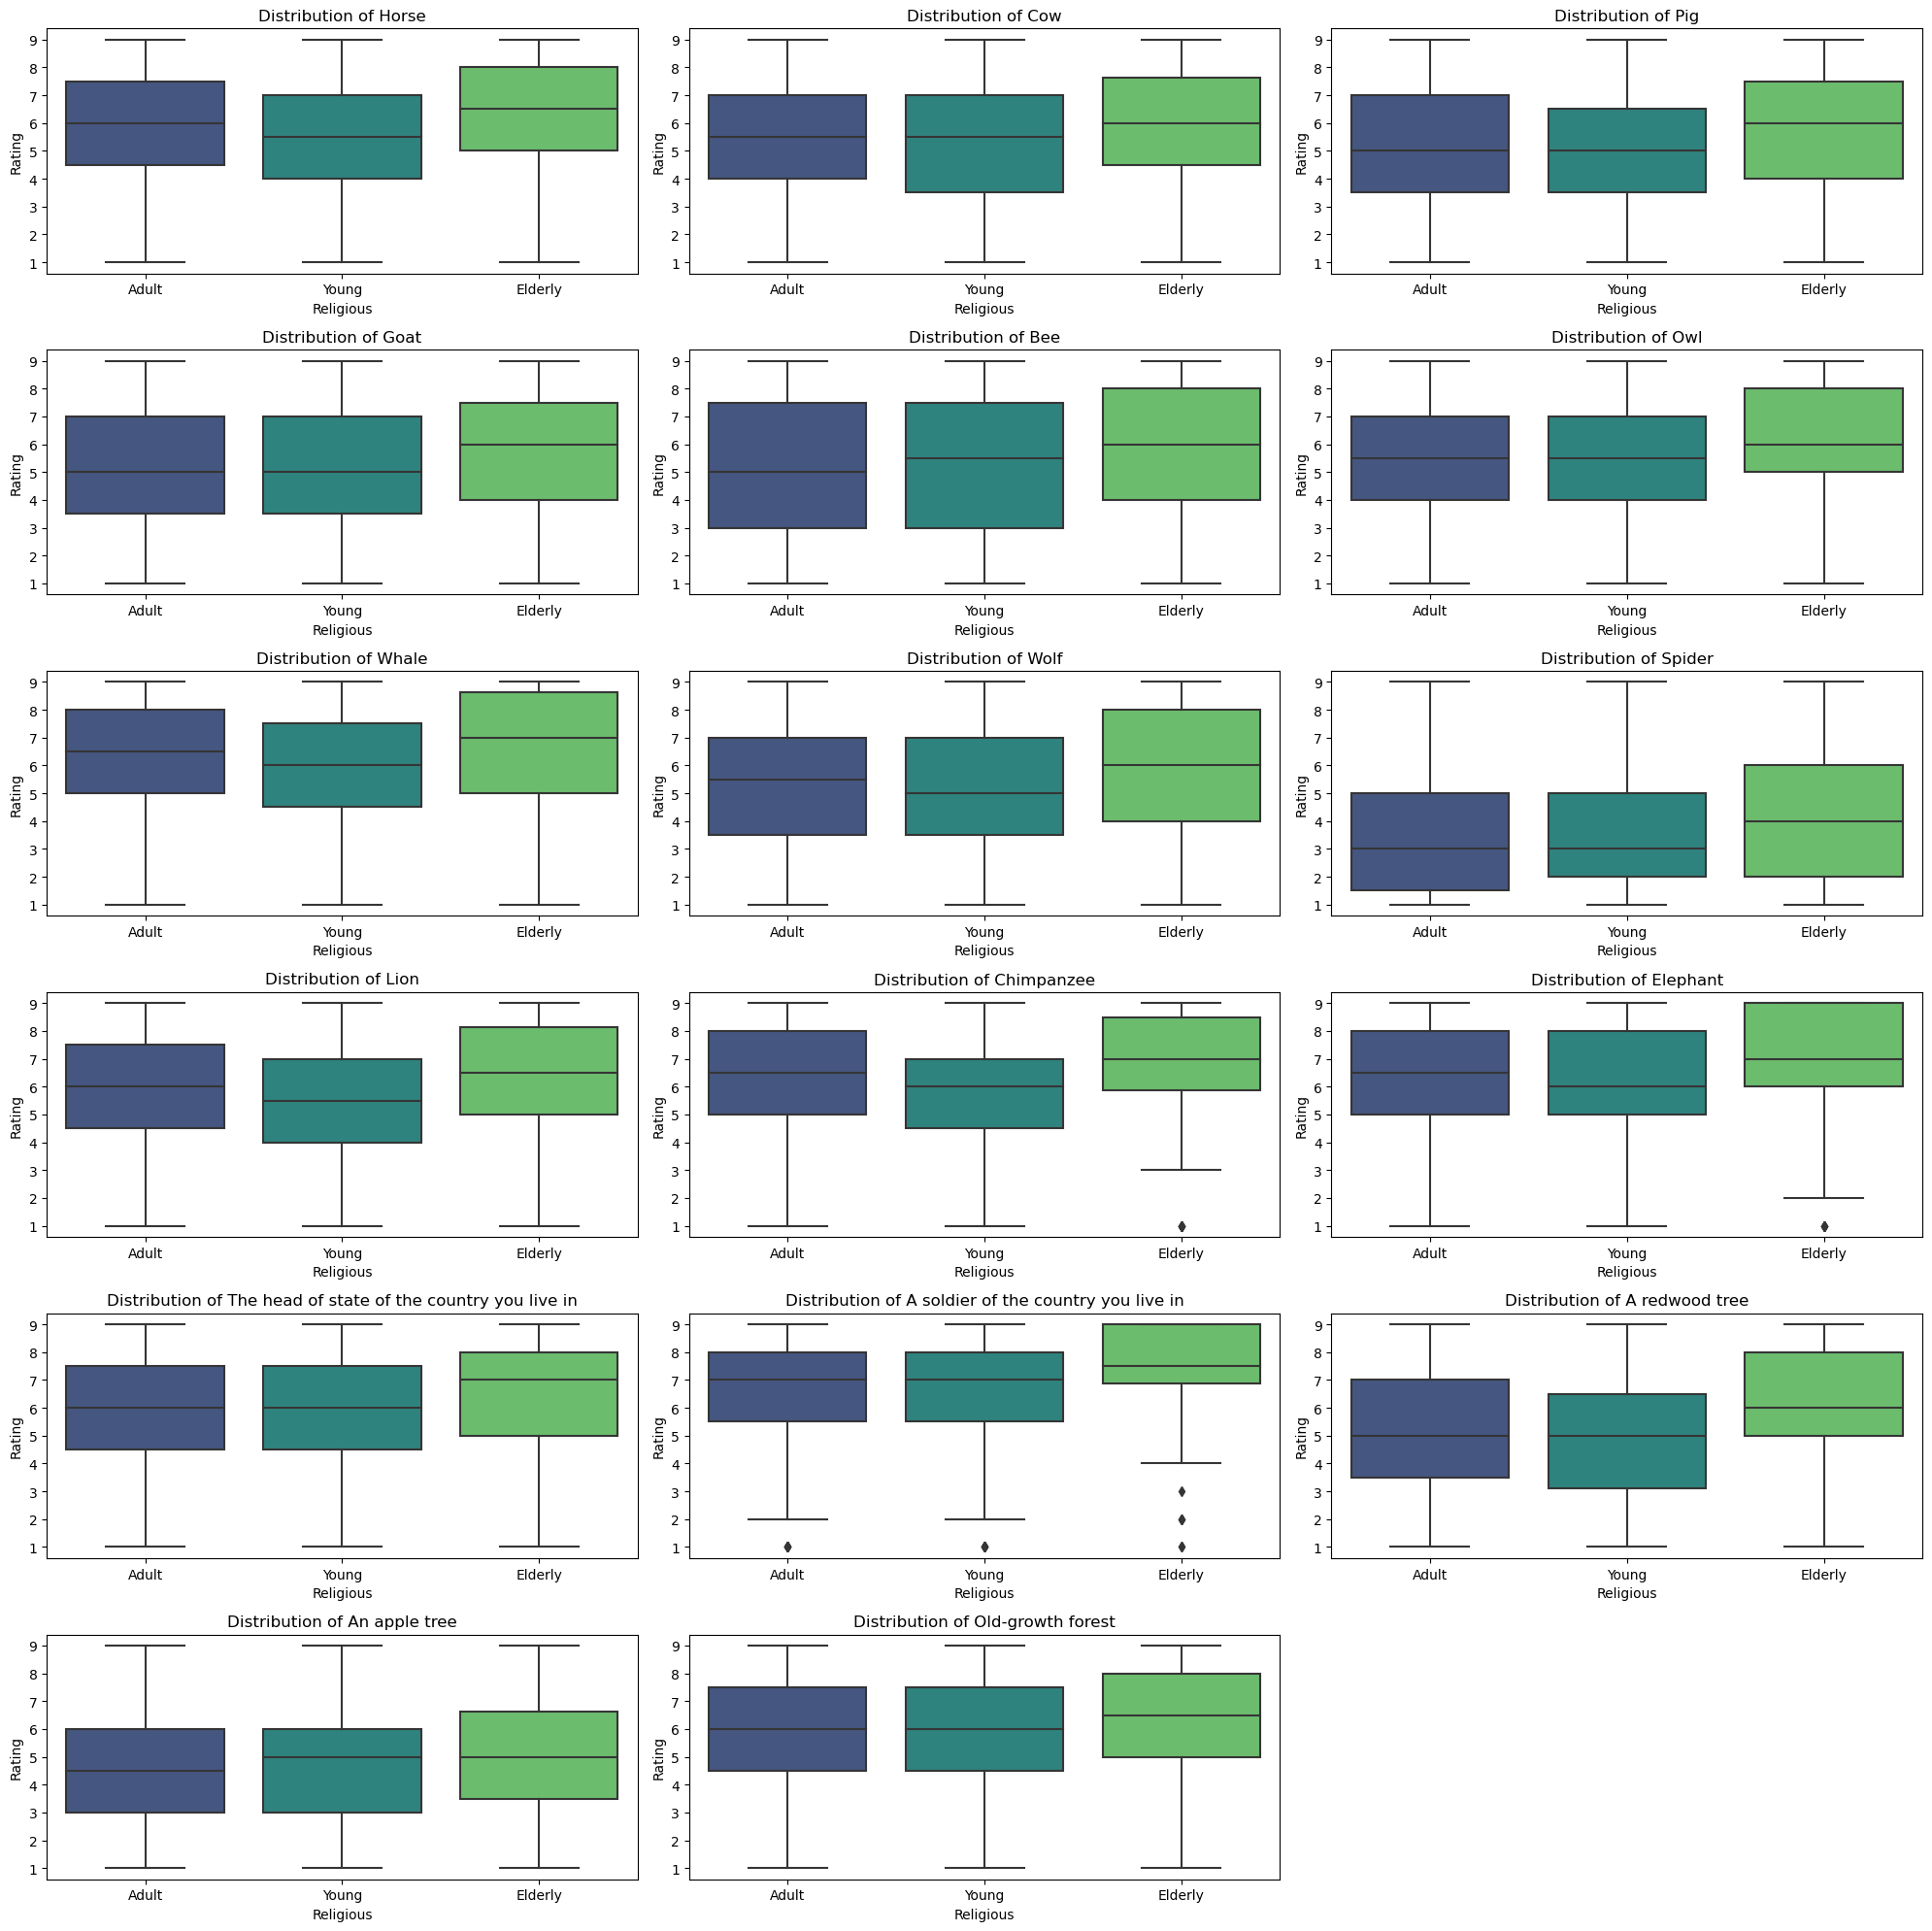

In [44]:
num_rows = 6
num_cols = 3

total_plots = len(affected_age)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()
for i, factor in enumerate(affected_age):
    sns.boxplot(x='age_group', y=factor, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {factor.capitalize()}')
    axes[i].set_xlabel('Religious')
    axes[i].set_ylabel('Rating')

for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Analysis effect of Diet

In [45]:
df = copy.deepcopy(data)
df = df[df['diet'] != 5]
diet_mapping = {
    1: 'Omnivore',
    2: 'Restricted omnivore',
    3: 'Vegetarian',
    4: 'Vegan'
}

# Map the values in the 'diet' column using the defined mapping
df['diet'] = df['diet'].map(diet_mapping)

# Print the DataFrame with the mapped values
print(df)

     Dog  Cat  Horse  Rabbit  Cow  Pig  Chicken  Goat  Sheep  Shrimp  ...  \
0    6.0  4.5    3.5     3.0  3.5  3.5      3.0   2.5    3.5     2.5  ...   
1    8.0  6.0    6.0     7.0  4.5  6.5      6.0   4.5    5.5     4.0  ...   
2    7.5  8.0    5.0     5.5  5.5  5.0      5.0   5.0    5.5     5.5  ...   
3    4.5  2.5    5.0     5.0  3.0  2.5      3.5   4.5    5.5     3.0  ...   
4    8.0  8.0    8.0     8.0  8.0  8.0      8.0   8.0    8.0     7.0  ...   
..   ...  ...    ...     ...  ...  ...      ...   ...    ...     ...  ...   
591  8.5  7.5    6.0     5.5  5.0  5.0      5.0   6.0    5.0     4.0  ...   
593  7.5  7.0    7.0     6.0  7.0  5.5      5.5   6.5    5.5     5.0  ...   
594  4.5  4.5    4.5     4.5  4.5  4.5      4.5   4.5    4.5     4.5  ...   
595  3.5  3.0    3.0     2.0  2.5  3.0      1.0   2.5    2.5     1.0  ...   
597  4.5  4.5    4.0     3.5  5.0  5.0      3.5   4.0    4.5     3.0  ...   

     reduce_meat_10                 diet  breakfast_meat  lunch_meat  \
0  

In [46]:
from scipy.stats import kstest

# Define the diet types
diet_types = ['Omnivore', 'Restricted omnivore', 'Vegetarian', 'Vegan']

for t in targets:
    for diet_type in diet_types:
        # Extract data for the current diet type
        data = df[df['diet'] == diet_type][t]
        
        # Perform the Kolmogorov-Smirnov test for normality
        ks_test = kstest(data, 'norm')
        
        # Print the result
        if ks_test.pvalue > 0.05:
            print(f"Normality assumption holds for '{t}' in the {diet_type} diet.")


` According to results obtained in Kolmogrov-Smiroff test normalcy is violated by all the entities. Thus we apply Kruskal Wallis Test.`

In [47]:
affected_diet = []
unaffected_diet = []

for t in targets:
    kruskal_result = pg.kruskal(data=df, dv=t, between='diet')
    if kruskal_result['p-unc'].iloc[0] < 0.05: 
        affected_diet.append(t) 
    else:
        unaffected_diet.append(t)  # Add to unaffected_politics list

print("Affected diet:", affected_diet)
print("Unaffected diet:", unaffected_diet)


Affected diet: ['Dog', 'Cat', 'Horse', 'Rabbit', 'Cow', 'Pig', 'Chicken', 'Goat', 'Sheep', 'Shrimp', 'Fish', 'Bee', 'Wasp', 'Ant', 'Fly', 'Octopus', 'Frog', 'Worm', 'Pigeon', 'Owl', 'Whale', 'Shark', 'Wolf', 'Snake', 'Rat', 'Spider', 'Mouse', 'Lion', 'Chimpanzee', 'Elephant', 'Somebody from your neighborhood', 'A co-worker', 'A foreign citizen', 'A charity worker', 'A homosexual person', 'A mentally challenged person', 'A refugee', 'A terrorist', 'A redwood tree', 'An apple tree', 'A rose bush', 'A coral reef', 'Old-growth forest', 'The highest mountain in the country you live in']
Unaffected diet: ['A family member', 'A close friend', 'Your partner/spouse', 'A citizen of the country you live in', 'A member of a political party you oppose', 'Somebody with different religious beliefs', 'The head of state of the country you live in', 'A soldier of the country you live in', 'A murderer', 'A child molester']


In [48]:
for column in affected_gender:
    print("\nFor", column)
    posthoc_test = pg.pairwise_tests(
        data=df,
        dv=column,
        between='diet',
        padjust="holm"
    )
    for index, row in posthoc_test.iterrows():
        group_a = row['A']
        group_b = row['B']
        t_value = row['T']
        try:
            p_val = row['p-unc']
        except KeyError:
            p_val = row['pval']
        
        # Print the inference based on the p-value
        if p_val < 0.05:
            if t_value > 0:
                print(f"The mean of group '{group_a}' is significantly higher than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
            elif t_value < 0:
                print(f"The mean of group '{group_a}' is significantly lower than the mean of group '{group_b}' (T = {t_value}, p = {p_val}).")
            else:
                print(f"There is no significant difference between the means of group '{group_a}' and group '{group_b}' (T = {t_value}, p = {p_val}).")



For Dog
The mean of group 'Omnivore' is significantly lower than the mean of group 'Vegan' (T = -5.235421774143226, p = 1.586842981570326e-05).
The mean of group 'Omnivore' is significantly lower than the mean of group 'Vegetarian' (T = -5.5732078220550525, p = 6.019082687365394e-07).
The mean of group 'Restricted omnivore' is significantly lower than the mean of group 'Vegan' (T = -3.1097320209306782, p = 0.0027528225740468763).
The mean of group 'Restricted omnivore' is significantly lower than the mean of group 'Vegetarian' (T = -3.062624728275576, p = 0.002936938189118539).

For Cat
The mean of group 'Omnivore' is significantly lower than the mean of group 'Vegan' (T = -5.384491545517025, p = 1.464892455229989e-05).
The mean of group 'Omnivore' is significantly lower than the mean of group 'Vegetarian' (T = -5.360286819558489, p = 1.5614469707697818e-06).
The mean of group 'Restricted omnivore' is significantly lower than the mean of group 'Vegan' (T = -3.5340974218936583, p = 0.0

| Animal                                        | Comparison                                   | T-value                 | p-value                   |
|------------------------------------------------|-----------------------------------------------|-------------------------|---------------------------|
| Dog                                            | Omnivore < Vegan                            | -5.235421774143226      | 1.586842981570326e-05     |
|                                                | Omnivore < Vegetarian                       | -5.5732078220550525     | 6.019082687365394e-07     |
|                                                | Restricted omnivore < Vegan                 | -3.1097320209306782     | 0.0027528225740468763     |
|                                                | Restricted omnivore < Vegetarian            | -3.062624728275576      | 0.002936938189118539      |
| Cat                                            | Omnivore < Vegan                            | -5.384491545517025      | 1.464892455229989e-05     |
|                                                | Omnivore < Vegetarian                       | -5.360286819558489      | 1.5614469707697818e-06    |
|                                                | Restricted omnivore < Vegan                 | -3.5340974218936583     | 0.0008144917068408516     |
|                                                | Restricted omnivore < Vegetarian            | -3.034123512756056      | 0.003164828968935834      |
| Horse                                          | Omnivore < Vegan                            | -6.298475129807378      | 1.628810339691168e-06     |
|                                                | Omnivore < Vegetarian                       | -7.643172687439489      | 2.439806879161696e-10     |
|                                                | Restricted omnivore < Vegan                 | -4.379575929043387      | 5.1766767685045265e-05    |
|                                                | Restricted omnivore < Vegetarian            | -4.512110981652129      | 2.0054769466511163e-05    |
| Rabbit                                         | Omnivore < Vegan                            | -6.72841548549679       | 6.732420777729729e-07     |
|                                                | Omnivore < Vegetarian                       | -7.082618714661796      | 3.301564161053038e-09     |
|                                                | Restricted omnivore < Vegan                 | -4.9847304518937685     | 7.28123980046896e-06      |
|                                                | Restricted omnivore < Vegetarian            | -4.645684912944168      | 1.1440036230626293e-05    |
| Cow                                            | Omnivore < Vegan                            | -8.03934852021524       | 2.689683972335952e-08     |
|                                                | Omnivore < Vegetarian                       | -7.247306649333142      | 1.7500390842245995e-09    |
|                                                | Restricted omnivore < Vegan                 | -5.004070723251439      | 5.560606702114512e-06     |
|                                                | Restricted omnivore < Vegetarian            | -3.970149222257559      | 0.00014390112074160906    |
| Pig                                            | Omnivore < Vegan                            | -7.623477504773864      | 8.337041892223733e-08     |
|                                                | Omnivore < Vegetarian                       | -6.139418820855504      | 1.3422326961034552e-07    |
|                                                | Restricted omnivore < Vegan                 | -5.0498566023539        | 4.676847660705116e-06     |
|                                                | Restricted omnivore < Vegetarian            | -3.752806849438931      | 0.000307623619908248      |
| Chicken                                        | Omnivore < Vegan                            | -7.3588654131567095     | 1.6320581078521562e-07    |
|                                                | Omnivore < Vegetarian                       | -4.955999877525899      | 8.910762383463225e-06     |
|                                                | Restricted omnivore < Vegan                 | -5.353457920795372      | 2.383372114709688e-06     |
|                                                | Restricted omnivore < Vegetarian            | -3.2615932367823133     | 0.0015761511234012042     |
|                                                | Vegan < Vegetarian                          | 2.201654012540015       | 0.03236078502632549       |
| Goat                                           | Omnivore < Vegan                            | -7.032058307134205      | 3.369635250631809e-07     |
|                                                | Omnivore < Vegetarian                       | -5.586032321759819      | 9.04452822544857e-07      |
|                                                | Restricted omnivore < Vegan                 | -4.629403680680157      | 2.477192366359802e-05     |
|                                                | Restricted omnivore < Vegetarian            | -3.1163057288996234     | 0.0024506153073974154     |
| Sheep                                          | Omnivore < Vegan                            | -5.493179987272689      | 1.536657743313552e-05     |
|                                                | Omnivore < Vegetarian                       | -6.602878537044582      | 2.266879602343687e-08     |
|                                                | Restricted omnivore < Vegan                 | -3.6558351785875316     | 0.0006852150968876306     |
|                                                | Restricted omnivore < Vegetarian            | -3.662955926712234      | 0.00041846533388327625    |
| Shrimp                                         | Omnivore < Vegan                            | -7.01182013623274       | 4.993252373916291e-07     |
|                                                | Omnivore < Vegetarian                       | -4.29494949665261       | 8.529981103321579e-05     |
|                                                | Restricted omnivore < Vegan                 | -5.717346694803798      | 1.3947854548020228e-06    |
|                                                | Restricted omnivore < Vegetarian            | -3.0644262781578546     | 0.0029220305052003537     |
|                                                | Vegan < Vegetarian                          | 2.952205599691701       | 0.00507279057317613       |
| Fish                                           | Omnivore < Vegan                            | -7.026156506318085      | 3.922549801048123e-07     |
|                                                | Omnivore < Vegetarian                       | -4.877442029428355      | 1.1628879960239327e-05    |
|                                                | Restricted omnivore < Vegan                 | -5.481614356606426      | 1.958438902115765e-06     |
|                                                | Restricted omnivore < Vegetarian            | -3.4334262666182327     | 0.0009111137363526054     |
|                                                | Vegan < Vegetarian                          | 2.3274384963808603      | 0.02437093789138141       |
| Bee | Omnivore vs Vegan | -6.621557615772794 | 6.028567940238679e-07 |
|  | Omnivore vs Vegetarian | -2.2715417193672525 | 0.027612881850315456 |
|  | Restricted omnivore vs Vegan | -3.555332414963545 | 0.000768695932012892 |
|  | Vegan vs Vegetarian | 2.6971525234111327 | 0.00910169260484623 |
| Ant | Omnivore vs Vegan | -6.95310794613976 | 5.817278815232071e-07 |
|  | Omnivore vs Vegetarian | -3.2370674042946193 | 0.0022359726537791763 |
|  | Restricted omnivore vs Vegan | -5.072251491566344 | 8.877206206512877e-06 |
|  | Vegan vs Vegetarian | 3.2557614814194884 | 0.0020940566800905017 |
| Octopus | Omnivore vs Vegan | -6.587714761462196 | 9.727840537790131e-07 |
|  | Omnivore vs Vegetarian | -4.064354460247114 | 0.00017489714188830243 |
|  | Restricted omnivore vs Vegan | -4.232754688610494 | 0.00011107860655267431 |
|  | Restricted omnivore vs Vegetarian | -2.0271117052061456 | 0.04577265235836209 |
|  | Vegan vs Vegetarian | 2.1549869424102597 | 0.03595029803210432 |
| Frog | Omnivore vs Vegan | -6.965308589381815 | 4.490838082953005e-07 |
|  | Omnivore vs Vegetarian | -4.990172861589747 | 8.018780757614204e-06 |
|  | Restricted omnivore vs Vegan | -5.332003516302314 | 2.980576456752861e-06 |
|  | Restricted omnivore vs Vegetarian | -3.4670363267162805 | 0.0008155034572762988 |
|  | Vegan vs Vegetarian | 2.113498081376079 | 0.03987235961474033 |
| Worm | Omnivore vs Vegan | -7.297513868352021 | 2.5405845931277e-07 |
|  | Omnivore vs Vegetarian | -3.9634469481417804 | 0.000249995370792816 |
|  | Restricted omnivore vs Vegan | -5.704245302688642 | 1.0804516838138024e-06 |
|  | Restricted omnivore vs Vegetarian | -2.730089119304541 | 0.007697057888614902 |
|  | Vegan vs Vegetarian | 3.028160674371113 | 0.003970109606402921 |
| Pigeon | Omnivore vs Vegan | -7.059373500236086 | 3.4313572792872244e-07 |
|  | Omnivore vs Vegetarian | -5.080063155921683 | 5.88016817642923e-06 |
|  | Restricted omnivore vs Vegan | -5.881876788095291 | 5.100399610881435e-07 |
|  | Restricted omnivore vs Vegetarian | -4.084376532360584 | 9.896366307534605e-05 |
| Owl | Omnivore vs Vegan | -6.841408543315018 | 4.4253879546812696e-07 |
|  | Omnivore vs Vegetarian | -5.473411622074758 | 1.319233814643618e-06 |
|  | Restricted omnivore vs Vegan | -4.383109346720621 | 4.920400001008676e-05 |
|  | Restricted omnivore vs Vegetarian | -3.154959302561236 | 0.002177273452812644 |
| Whale | Omnivore vs Vegan | -5.9951831821350146 | 2.93899595645889e-06 |
|  | Omnivore vs Vegetarian | -5.653466647355089 | 5.627436020358581e-07 |
|  | Restricted omnivore vs Vegan | -3.7744616397205104 | 0.0004157916714866517 |
|  | Restricted omnivore vs Vegetarian | -3.144084336478585 | 0.0022511483444354547 |
| Shark | Omnivore vs Vegan | -5.21895255705234 | 2.9966019068691214e-05 |
|  | Omnivore vs Vegetarian | -3.6621430275756945 | 0.0006264508284205855 |
|  | Restricted omnivore vs Vegan | -4.009290960367319 | 0.0002600363524216301 |
|  | Restricted omnivore vs Vegetarian | -2.4849646494080466 | 0.0149502077501498 |
| Wolf | Omnivore vs Vegan | -7.360389724696837 | 1.3139016601468576e-07 |
|  | Omnivore vs Vegetarian | -4.739043579452993 | 1.8793585046084015e-05 |
|  | Restricted omnivore vs Vegan | -5.151985676598507 | 3.331471830069543e-06 |
|  | Restricted omnivore vs Vegetarian | -3.2358561230527996 | 0.001698857452556386 |
|
| Snake | Omnivore vs Vegan | -6.749151328747389 | 7.809342464970751e-07 |
|  | Omnivore vs Vegetarian | -3.0211078102786773 | 0.0040863510452940075 |
|  | Restricted omnivore vs Vegan | -6.561132218048344 | 7.555299081765798e-08 |
|  | Restricted omnivore vs Vegetarian | -3.4027248059406996 | 0.0010603444857408197 |
|  | Vegan vs Vegetarian | 2.8213173013025368 | 0.006733175305703947 |
| Rat | Omnivore vs Vegan | -7.600940101722117 | 1.357334176274946e-07 |
|  | Omnivore vs Vegetarian | -5.353256128553757 | 2.480426584676889e-06 |
|  | Restricted omnivore vs Vegan | -6.930572160663342 | 2.8266753759668273e-08 |
|  | Restricted omnivore vs Vegetarian | -4.805834177510653 | 6.713481933146793e-06 |
|  | Vegan vs Vegetarian | 2.543409050952757 | 0.014446765556175375 |
| Mouse | Omnivore vs Vegan | -7.7174716973043385 | 8.790943111052332e-08 |
|  | Omnivore vs Vegetarian | -5.007346013852437 | 7.602153739686989e-06 |
|  | Restricted omnivore vs Vegan | -6.487809216594272 | 5.295315168964402e-08 |
|  | Restricted omnivore vs Vegetarian | -4.079771185766777 | 9.79606233842956e-05 |
|  | Vegan vs Vegetarian | 2.7487793134710397 | 0.008480303274923232 |
| Lion | Omnivore vs Vegan | -6.325299470558211 | 1.4148778334213736e-06 |
|  | Omnivore vs Vegetarian | -3.4268106891369876 | 0.001257073995028552 |
|  | Restricted omnivore vs Vegan | -3.9351075342651645 | 0.0002464183791979188 |
| Chimpanzee | Omnivore vs Vegan | -7.315804998517613 | 9.178470835601742e-08 |
|  | Omnivore vs Vegetarian | -4.003395070319917 | 0.00020684081380422655 |
|  | Restricted omnivore vs Vegan | -4.583308117978912 | 2.3138830484856524e-05 |
|  | Restricted omnivore vs Vegetarian | -2.405008577076991 | 0.018247855077159873 |
| Elephant | Omnivore vs Vegan | -5.825591284350118 | 4.296257314173833e-06 |
|  | Omnivore vs Vegetarian | -5.543781583088625 | 7.758382267554368e-07 |
|  | Restricted omnivore vs Vegan | -3.823107600137989 | 0.0003295304539079604 |
|  | Restricted omnivore vs Vegetarian | -3.2259711320757987 | 0.0017495952720815674 |
| A family member |  |  |  |
| A close friend | Omnivore vs Vegan | -2.313629196010644 | 0.02786884181800649 |
|  | Omnivore vs Vegetarian | -3.1311043962595733 | 0.0025439984221447007 |
| A citizen of the country you live in |  |  |  |
| Somebody from your neighborhood | Omnivore vs Vegan | -2.1406015309080724 | 0.04368038585652102 |
| A co-worker | Omnivore vs Vegan | -2.644305430477951 | 0.014455347866061348 |
|  | Restricted omnivore vs Vegan | -2.175823294884779 | 0.034921626548708666 |
| A foreign citizen | Omnivore vs Vegan | -3.3221137289197866 | 0.002904206765263958 |
|  | Omnivore vs Vegetarian | -2.0997051850095887 | 0.040958919959573806 |
|  | Restricted omnivore vs Vegan | -2.1648822993575303 | 0.03572391384750139 |
| Somebody with different religious beliefs | Omnivore vs Vegan | -2.529947981210951 | 0.018808075564080592 |
| The head of state of the country you live in |  |  |  |
| A soldier of the country you live in |  |  |  |
| A charity worker | Omnivore vs Restricted omnivore | -1.9991930268463538 | 0.04990942166659959 |
|  | Omnivore vs Vegan | -4.314697413515664 | 0.0002026096076429647 |
| A homosexual person | Omnivore vs Vegan | -3.768417554643285 | 0.0008530007608583276 |
|  | Omnivore vs Vegetarian | -2.254745313643552 | 0.028472363337566663 |
|  | Restricted omnivore vs Vegan | -2.4420093033573744 | 0.017173630939399855 |
| A mentally challenged person | Omnivore vs Vegan | -3.9522675512302543 | 0.0005170140206136203 |
|  | Restricted omnivore vs Vegan | -2.1368080872644857 | 0.036510967928945114 |
| A refugee | Omnivore vs Vegan | -6.035917713889688 | 1.3268159303979862e-06 |
|  | Omnivore vs Vegetarian | -2.9138639520227265 | 0.005273922779133801 |
|  | Restricted omnivore vs Vegan | -2.5237588173447496 | 0.013953440429365693 |
| A redwood tree | Omnivore vs Vegan | -2.3948279530954677 | 0.02547830787776722 |
|  | Omnivore vs Vegetarian | -3.3952267940359784 | 0.0013428184836473654 |
| An apple tree | Omnivore vs Vegan | -2.097115586078626 | 0.04780012426131032 |
|  | Omnivore vs Vegetarian | -3.1531994123546188 | 0.0027846370524484327 |
| A rose bush | Omnivore vs Vegetarian | -2.468357951409823 | 0.017089781965041836 |
| A coral reef | Omnivore vs Vegan | -3.3476814064930407 | 0.002704739922582806 |
|  | Omnivore vs Vegetarian | -4.326330999299499 | 6.560086274798503e-05 |
|  | Restricted omnivore vs Vegetarian | -2.025045121063476 | 0.04579383674359834 |

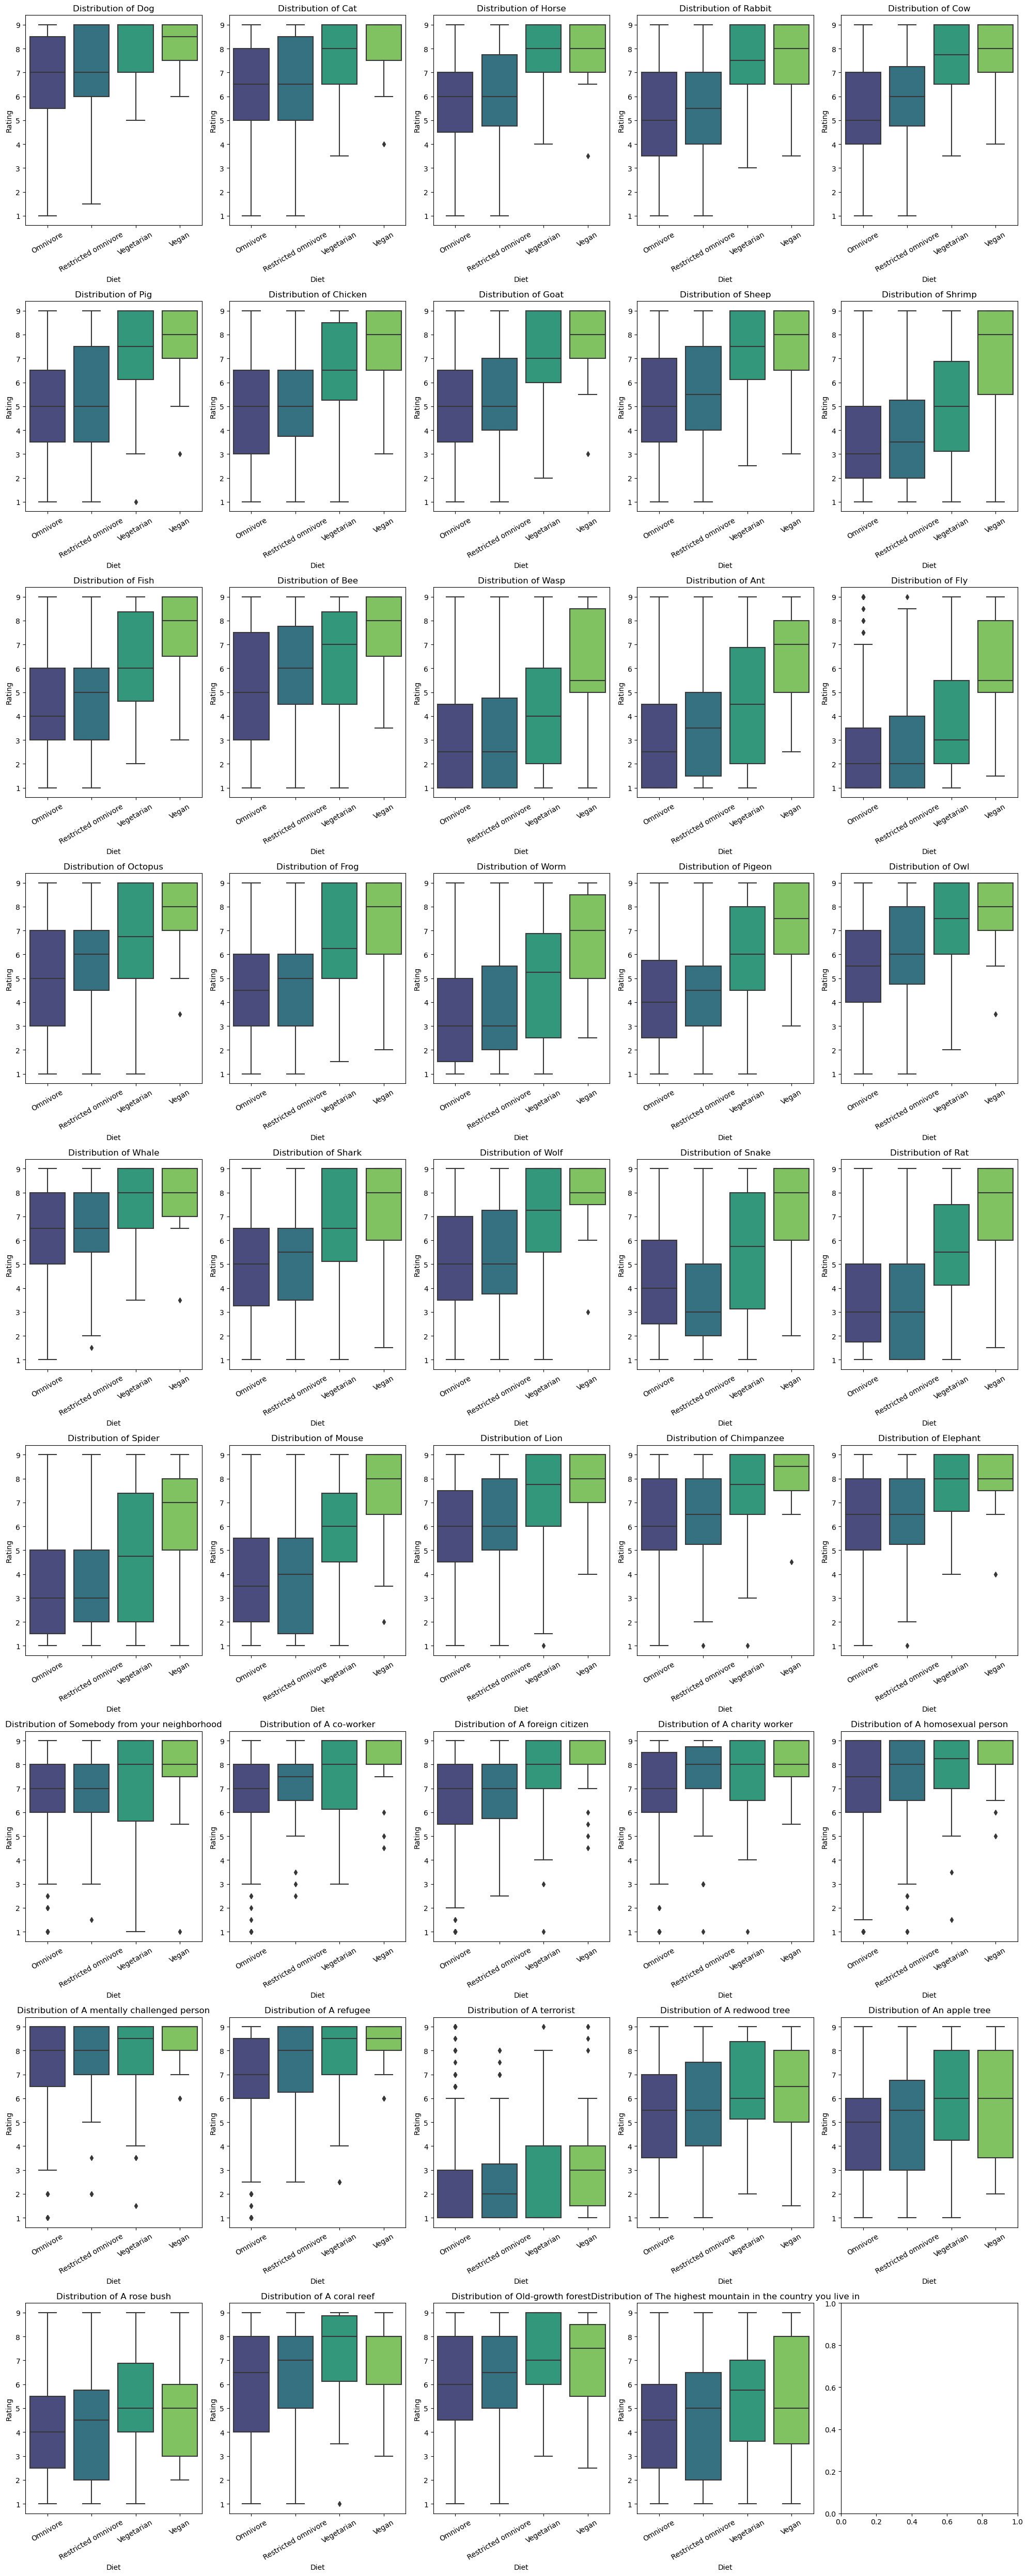

In [49]:
num_rows = 9
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 50))
axes = axes.flatten()

for i, factor in enumerate(affected_diet):
    if i >= len(axes):
        break  # Skip if we've reached the end of the subplots
    sns.boxplot(x='diet', y=factor, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {factor.capitalize()}')
    axes[i].set_xlabel('Diet')
    axes[i].set_ylabel('Rating')
    plt.sca(axes[i])
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()